In [ ]:
# Install necessary libraries
!pip install nilearn boto3 s3fs nibabel pandas scikit-learn matplotlib seaborn

INFO: pip is looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/

In [ ]:
# Imports
import boto3
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn.input_data import NiftiLabelsMasker
from nilearn import plotting, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# 📥 Load ABIDE dataset (preprocessed with CCS pipeline)
data = datasets.fetch_abide_pcp(derivatives='func_preproc', pipeline='ccs', quality_checked=True)


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/ABIDE_pcp

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
003_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29622272 of 56188173 bytes (52.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
004_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28590080 of 58855041 bytes (48.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
005_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24387584 of 60326425 bytes (40.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
006_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30416896 of 62841516 bytes (48.4%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
007_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29155328 of 54128681 bytes (53.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
008_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21880832 of 56257045 bytes (38.9%%,    1.6s remaining)

[_chunk_report_] Downloaded 54362112 of 56257045 bytes (96.6%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
010_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29016064 of 60554656 bytes (47.9%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
011_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25223168 of 52751116 bytes (47.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
012_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24018944 of 59849370 bytes (40.1%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
013_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22241280 of 59709580 bytes (37.2%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
014_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23265280 of 58833176 bytes (39.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
015_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24780800 of 59698725 bytes (41.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
016_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 262144 of 53952219 bytes (0.5%%,  3.6min remaining)

[_chunk_report_] Downloaded 712704 of 53952219 bytes (1.3%%,  2.6min remaining)

[_chunk_report_] Downloaded 1343488 of 53952219 bytes (2.5%%,  2.0min remaining)

[_chunk_report_] Downloaded 2179072 of 53952219 bytes (4.0%%,  1.6min remaining)

[_chunk_report_] Downloaded 3203072 of 53952219 bytes (5.9%%,  1.4min remaining)

[_chunk_report_] Downloaded 4423680 of 53952219 bytes (8.2%%,  1.1min remaining)

[_chunk_report_] Downloaded 5849088 of 53952219 bytes (10.8%%,   59.1s remaining)

[_chunk_report_] Downloaded 7782400 of 53952219 bytes (14.4%%,   48.7s remaining)

[_chunk_report_] Downloaded 10797056 of 53952219 bytes (20.0%%,   36.8s remaining)

[_chunk_report_] Downloaded 15269888 of 53952219 bytes (28.3%%,   25.9s remaining)

[_chunk_report_] Downloaded 21643264 of 53952219 bytes (40.1%%,   16.8s remaining)

[_chunk_report_] Downloaded 30351360 of 53952219 bytes (56.3%%,    9.5s remaining)

[_chunk_report_] Downloaded 42065920 of 53952219 bytes (78.0%%,    3.7s remaining)

[fetch_single_file]  ...done. (15 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
020_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25387008 of 59532800 bytes (42.6%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
022_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28262400 of 58354521 bytes (48.4%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
023_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31555584 of 59928590 bytes (52.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
024_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26034176 of 55552880 bytes (46.9%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
025_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27361280 of 59038133 bytes (46.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
026_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24322048 of 56817782 bytes (42.8%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
027_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26132480 of 63653326 bytes (41.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
028_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25354240 of 59933326 bytes (42.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
030_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26140672 of 58352524 bytes (44.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
031_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28540928 of 61628075 bytes (46.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
032_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27033600 of 54762010 bytes (49.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
033_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26116096 of 63183174 bytes (41.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
034_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26533888 of 61559391 bytes (43.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
035_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26935296 of 52732047 bytes (51.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
036_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26042368 of 64823629 bytes (40.2%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
037_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25788416 of 56803595 bytes (45.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
038_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26869760 of 60190169 bytes (44.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
039_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25993216 of 56915563 bytes (45.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
040_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27197440 of 59770975 bytes (45.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
041_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23953408 of 54960812 bytes (43.6%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
042_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29786112 of 56493803 bytes (52.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
043_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22282240 of 60292892 bytes (37.0%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
044_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22740992 of 56978585 bytes (39.9%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
045_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24133632 of 50764515 bytes (47.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
046_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30515200 of 59513020 bytes (51.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
047_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26533888 of 56723539 bytes (46.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
048_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24969216 of 60309269 bytes (41.4%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
049_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26148864 of 63061994 bytes (41.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
050_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26533888 of 54730226 bytes (48.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
051_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25804800 of 61232647 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
052_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29171712 of 54297094 bytes (53.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
053_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24068096 of 58959493 bytes (40.8%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
054_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25845760 of 62347514 bytes (41.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
056_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26550272 of 63549827 bytes (41.8%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
057_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27074560 of 63285283 bytes (42.8%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
059_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27475968 of 59892452 bytes (45.9%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Pitt_0050
060_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28114944 of 56514901 bytes (49.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
102_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27533312 of 79922653 bytes (34.4%%,    1.9s remaining)

[_chunk_report_] Downloaded 76505088 of 79922653 bytes (95.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
103_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26009600 of 72221047 bytes (36.0%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
104_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25608192 of 69749606 bytes (36.7%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
105_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24698880 of 69232531 bytes (35.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 67461120 of 69232531 bytes (97.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
106_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25665536 of 73413661 bytes (35.0%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
107_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25567232 of 66185198 bytes (38.6%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
109_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24788992 of 71616936 bytes (34.6%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
111_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25608192 of 80290036 bytes (31.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 65142784 of 80290036 bytes (81.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
112_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23773184 of 71337841 bytes (33.3%%,    2.0s remaining)

[_chunk_report_] Downloaded 65036288 of 71337841 bytes (91.2%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
113_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24895488 of 74454838 bytes (33.4%%,    2.0s remaining)

[_chunk_report_] Downloaded 69771264 of 74454838 bytes (93.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
114_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26918912 of 72629847 bytes (37.1%%,    1.7s remaining)

[_chunk_report_] Downloaded 66535424 of 72629847 bytes (91.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
115_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25640960 of 80396701 bytes (31.9%%,    2.2s remaining)

[_chunk_report_] Downloaded 74211328 of 80396701 bytes (92.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
116_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31637504 of 73784721 bytes (42.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
117_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25878528 of 68777262 bytes (37.6%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
118_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25149440 of 70264844 bytes (35.8%%,    1.8s remaining)

[_chunk_report_] Downloaded 68108288 of 70264844 bytes (96.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
119_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23756800 of 70039191 bytes (33.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 63455232 of 70039191 bytes (90.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
121_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28139520 of 67666552 bytes (41.6%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
123_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24584192 of 68050724 bytes (36.1%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
124_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24879104 of 68352574 bytes (36.4%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
125_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24076288 of 68587134 bytes (35.1%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
127_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18530304 of 70353392 bytes (26.3%%,    2.9s remaining)

[_chunk_report_] Downloaded 48496640 of 70353392 bytes (68.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
128_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24887296 of 74660161 bytes (33.3%%,    2.1s remaining)

[_chunk_report_] Downloaded 72499200 of 74660161 bytes (97.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
129_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25149440 of 72935198 bytes (34.5%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
130_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26787840 of 68686695 bytes (39.0%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
131_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29474816 of 65976875 bytes (44.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
132_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26640384 of 68954076 bytes (38.6%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
134_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24772608 of 69355058 bytes (35.7%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Olin_0050
135_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21495808 of 69641642 bytes (30.9%%,    2.4s remaining)

[_chunk_report_] Downloaded 60194816 of 69641642 bytes (86.4%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
142_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
143_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
144_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
145_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22265856 of 27532689 bytes (80.9%%,    0.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
146_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23519232 of 27047104 bytes (87.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
147_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24305664 of 26971633 bytes (90.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
148_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26238976 of 26449226 bytes (99.2%%,    0.0s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
149_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 15343616 of 25698085 bytes (59.7%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
150_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24584192 of 28071949 bytes (87.6%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
152_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25034752 of 26710344 bytes (93.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
153_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
156_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23347200 of 25056802 bytes (93.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
157_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24985600 of 26386612 bytes (94.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
158_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23912448 of 27615209 bytes (86.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
159_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25133056 of 26756967 bytes (93.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
160_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21889024 of 26873948 bytes (81.5%%,    0.2s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
161_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25821184 of 26067360 bytes (99.1%%,    0.0s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
162_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
163_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
164_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
167_func_preproc.nii.gz ...

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
168_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23863296 of 26841548 bytes (88.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
169_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26025984 of 26431775 bytes (98.5%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
170_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23789568 of 26089435 bytes (91.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/OHSU_0050
171_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24174592 of 26542154 bytes (91.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
182_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26058752 of 56059384 bytes (46.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
183_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25378816 of 57743981 bytes (44.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
184_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26238976 of 51849950 bytes (50.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
186_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23166976 of 59806864 bytes (38.7%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
187_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25051136 of 56975848 bytes (44.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
188_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25092096 of 56487988 bytes (44.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
189_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27705344 of 55354134 bytes (50.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
190_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28950528 of 53677942 bytes (53.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
193_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28704768 of 55812422 bytes (51.4%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
194_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17604608 of 57945263 bytes (30.4%%,    2.3s remaining)

[_chunk_report_] Downloaded 33742848 of 57945263 bytes (58.2%%,    1.5s remaining)

[_chunk_report_] Downloaded 42524672 of 57945263 bytes (73.4%%,    1.1s remaining)

[_chunk_report_] Downloaded 51257344 of 57945263 bytes (88.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (5 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
195_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25772032 of 58679121 bytes (43.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
196_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28270592 of 58792344 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
198_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27172864 of 54975646 bytes (49.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
199_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31203328 of 55202431 bytes (56.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
200_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24707072 of 56234570 bytes (43.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
201_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27910144 of 57819833 bytes (48.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
202_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24821760 of 57190146 bytes (43.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
203_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28246016 of 56959622 bytes (49.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
204_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23486464 of 57129808 bytes (41.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
205_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30777344 of 54345505 bytes (56.6%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
206_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28934144 of 60530545 bytes (47.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
208_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24453120 of 59399803 bytes (41.2%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
210_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25763840 of 53005375 bytes (48.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
213_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25223168 of 59928071 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
214_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28295168 of 56614218 bytes (50.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
215_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24117248 of 54802789 bytes (44.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SDSU_0050
217_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 20832256 of 57347471 bytes (36.3%%,    1.8s remaining)

[_chunk_report_] Downloaded 52846592 of 57347471 bytes (92.2%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050232_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24805376 of 47537102 bytes (52.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050233_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24698880 of 44724872 bytes (55.2%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050234_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28663808 of 43883500 bytes (65.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050236_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24887296 of 44065058 bytes (56.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050237_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27213824 of 43316492 bytes (62.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050239_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25616384 of 46063393 bytes (55.6%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050240_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22863872 of 46858059 bytes (48.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050241_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 16588800 of 47176743 bytes (35.2%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050243_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27795456 of 49119126 bytes (56.6%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050245_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25444352 of 45893872 bytes (55.4%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050247_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25853952 of 49012295 bytes (52.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050248_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23445504 of 47973856 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050249_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24854528 of 46495933 bytes (53.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050250_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23912448 of 49171336 bytes (48.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050251_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27484160 of 48302688 bytes (56.9%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050252_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28573696 of 48722895 bytes (58.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050253_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27500544 of 47184906 bytes (58.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050254_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26918912 of 47434059 bytes (56.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050255_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 32079872 of 44390187 bytes (72.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050257_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29515776 of 47485961 bytes (62.2%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050259_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27705344 of 45742856 bytes (60.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050260_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27377664 of 44275702 bytes (61.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050261_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26787840 of 43617077 bytes (61.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050262_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25280512 of 48943455 bytes (51.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050263_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25124864 of 44253254 bytes (56.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050264_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29401088 of 44904523 bytes (65.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050265_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27123712 of 48693980 bytes (55.7%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050266_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25337856 of 46228157 bytes (54.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050267_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23953408 of 45895238 bytes (52.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050268_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24281088 of 46929808 bytes (51.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050269_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22765568 of 47327937 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050270_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23314432 of 46484771 bytes (50.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
050271_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22478848 of 47149779 bytes (47.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
272_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22560768 of 114965450 bytes (19.6%%,    4.1s remaining)

[_chunk_report_] Downloaded 65290240 of 114965450 bytes (56.8%%,    1.5s remaining)

[_chunk_report_] Downloaded 108642304 of 114965450 bytes (94.5%%,    0.2s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
273_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17252352 of 98332884 bytes (17.5%%,    4.7s remaining)

[_chunk_report_] Downloaded 46645248 of 98332884 bytes (47.4%%,    2.2s remaining)

[_chunk_report_] Downloaded 78036992 of 98332884 bytes (79.4%%,    0.8s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
274_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23552000 of 101788795 bytes (23.1%%,    3.3s remaining)

[_chunk_report_] Downloaded 69836800 of 101788795 bytes (68.6%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
275_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25010176 of 106961535 bytes (23.4%%,    3.3s remaining)

[_chunk_report_] Downloaded 65265664 of 106961535 bytes (61.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
276_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26484736 of 94303842 bytes (28.1%%,    2.6s remaining)

[_chunk_report_] Downloaded 74948608 of 94303842 bytes (79.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
278_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 95230475 bytes (26.4%%,    2.8s remaining)

[_chunk_report_] Downloaded 63430656 of 95230475 bytes (66.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
282_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24027136 of 98043335 bytes (24.5%%,    3.1s remaining)

[_chunk_report_] Downloaded 63848448 of 98043335 bytes (65.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
284_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22732800 of 105230539 bytes (21.6%%,    3.7s remaining)

[_chunk_report_] Downloaded 67903488 of 105230539 bytes (64.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
285_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28508160 of 96960843 bytes (29.4%%,    2.4s remaining)

[_chunk_report_] Downloaded 76701696 of 96960843 bytes (79.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
287_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23969792 of 114935498 bytes (20.9%%,    3.8s remaining)

[_chunk_report_] Downloaded 64323584 of 114935498 bytes (56.0%%,    1.6s remaining)

[_chunk_report_] Downloaded 112205824 of 114935498 bytes (97.6%%,    0.1s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
289_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23232512 of 100003288 bytes (23.2%%,    3.3s remaining)

[_chunk_report_] Downloaded 61571072 of 100003288 bytes (61.6%%,    1.3s remaining)

[_chunk_report_] Downloaded 96501760 of 100003288 bytes (96.5%%,    0.1s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
290_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25460736 of 96913398 bytes (26.3%%,    2.8s remaining)

[_chunk_report_] Downloaded 74375168 of 96913398 bytes (76.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
291_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24256512 of 98244786 bytes (24.7%%,    3.1s remaining)

[_chunk_report_] Downloaded 61349888 of 98244786 bytes (62.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
292_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22339584 of 99869719 bytes (22.4%%,    3.5s remaining)

[_chunk_report_] Downloaded 60530688 of 99869719 bytes (60.6%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
293_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23019520 of 128862998 bytes (17.9%%,    4.6s remaining)

[_chunk_report_] Downloaded 71344128 of 128862998 bytes (55.4%%,    1.6s remaining)

[_chunk_report_] Downloaded 121552896 of 128862998 bytes (94.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
294_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23674880 of 104988906 bytes (22.5%%,    3.4s remaining)

[_chunk_report_] Downloaded 61661184 of 104988906 bytes (58.7%%,    1.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
295_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27074560 of 98082159 bytes (27.6%%,    2.8s remaining)

[_chunk_report_] Downloaded 77783040 of 98082159 bytes (79.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
297_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26992640 of 96955077 bytes (27.8%%,    2.6s remaining)

[_chunk_report_] Downloaded 69697536 of 96955077 bytes (71.9%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
298_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27312128 of 106045347 bytes (25.8%%,    2.9s remaining)

[_chunk_report_] Downloaded 72204288 of 106045347 bytes (68.1%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
300_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29892608 of 106282744 bytes (28.1%%,    2.6s remaining)

[_chunk_report_] Downloaded 81649664 of 106282744 bytes (76.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
301_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26492928 of 100663412 bytes (26.3%%,    2.8s remaining)

[_chunk_report_] Downloaded 67100672 of 100663412 bytes (66.7%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
302_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25411584 of 102621275 bytes (24.8%%,    3.2s remaining)

[_chunk_report_] Downloaded 71892992 of 102621275 bytes (70.1%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
304_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24223744 of 121983582 bytes (19.9%%,    4.0s remaining)

[_chunk_report_] Downloaded 73531392 of 121983582 bytes (60.3%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
308_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27197440 of 105111612 bytes (25.9%%,    3.0s remaining)

[_chunk_report_] Downloaded 74956800 of 105111612 bytes (71.3%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
310_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26402816 of 101158673 bytes (26.1%%,    2.8s remaining)

[_chunk_report_] Downloaded 64872448 of 101158673 bytes (64.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
312_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25182208 of 101117447 bytes (24.9%%,    3.0s remaining)

[_chunk_report_] Downloaded 58712064 of 101117447 bytes (58.1%%,    1.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
314_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24461312 of 96773855 bytes (25.3%%,    3.0s remaining)

[_chunk_report_] Downloaded 62472192 of 96773855 bytes (64.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
315_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29450240 of 94827141 bytes (31.1%%,    2.2s remaining)

[_chunk_report_] Downloaded 79241216 of 94827141 bytes (83.6%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
318_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25862144 of 100347806 bytes (25.8%%,    2.9s remaining)

[_chunk_report_] Downloaded 64544768 of 100347806 bytes (64.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
319_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24854528 of 97301307 bytes (25.5%%,    2.9s remaining)

[_chunk_report_] Downloaded 74186752 of 97301307 bytes (76.2%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
320_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22896640 of 102498938 bytes (22.3%%,    3.5s remaining)

[_chunk_report_] Downloaded 67854336 of 102498938 bytes (66.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
321_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23543808 of 89358985 bytes (26.3%%,    2.8s remaining)

[_chunk_report_] Downloaded 73269248 of 89358985 bytes (82.0%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
324_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23232512 of 95136188 bytes (24.4%%,    3.1s remaining)

[_chunk_report_] Downloaded 71385088 of 95136188 bytes (75.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
325_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23363584 of 99606648 bytes (23.5%%,    3.3s remaining)

[_chunk_report_] Downloaded 56549376 of 99606648 bytes (56.8%%,    1.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
327_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24641536 of 107910472 bytes (22.8%%,    3.4s remaining)

[_chunk_report_] Downloaded 66887680 of 107910472 bytes (62.0%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
329_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26714112 of 91456189 bytes (29.2%%,    2.4s remaining)

[_chunk_report_] Downloaded 64643072 of 91456189 bytes (70.7%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
330_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26935296 of 98132553 bytes (27.4%%,    2.6s remaining)

[_chunk_report_] Downloaded 72564736 of 98132553 bytes (73.9%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
331_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23805952 of 95499083 bytes (24.9%%,    3.0s remaining)

[_chunk_report_] Downloaded 71426048 of 95499083 bytes (74.8%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
332_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25526272 of 111416851 bytes (22.9%%,    3.4s remaining)

[_chunk_report_] Downloaded 67551232 of 111416851 bytes (60.6%%,    1.3s remaining)

[_chunk_report_] Downloaded 109182976 of 111416851 bytes (98.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
333_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25100288 of 102670796 bytes (24.4%%,    3.1s remaining)

[_chunk_report_] Downloaded 75816960 of 102670796 bytes (73.8%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
334_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24297472 of 107861742 bytes (22.5%%,    3.4s remaining)

[_chunk_report_] Downloaded 74104832 of 107861742 bytes (68.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
335_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23617536 of 98213897 bytes (24.0%%,    3.2s remaining)

[_chunk_report_] Downloaded 73990144 of 98213897 bytes (75.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
336_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 19857408 of 111645687 bytes (17.8%%,    4.6s remaining)

[_chunk_report_] Downloaded 69025792 of 111645687 bytes (61.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
337_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27099136 of 110270342 bytes (24.6%%,    3.1s remaining)

[_chunk_report_] Downloaded 72466432 of 110270342 bytes (65.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
338_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25878528 of 93081082 bytes (27.8%%,    2.6s remaining)

[_chunk_report_] Downloaded 72376320 of 93081082 bytes (77.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
339_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26181632 of 102003595 bytes (25.7%%,    2.9s remaining)

[_chunk_report_] Downloaded 75448320 of 102003595 bytes (74.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
340_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24961024 of 100401415 bytes (24.9%%,    3.2s remaining)

[_chunk_report_] Downloaded 58712064 of 100401415 bytes (58.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
341_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18227200 of 101593680 bytes (17.9%%,    4.8s remaining)

[_chunk_report_] Downloaded 48865280 of 101593680 bytes (48.1%%,    2.2s remaining)

[_chunk_report_] Downloaded 79421440 of 101593680 bytes (78.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
342_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27222016 of 111721093 bytes (24.4%%,    3.1s remaining)

[_chunk_report_] Downloaded 73572352 of 111721093 bytes (65.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
343_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30212096 of 102823924 bytes (29.4%%,    2.4s remaining)

[_chunk_report_] Downloaded 80232448 of 102823924 bytes (78.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
344_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26869760 of 110891290 bytes (24.2%%,    3.1s remaining)

[_chunk_report_] Downloaded 75489280 of 110891290 bytes (68.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
345_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26025984 of 100011076 bytes (26.0%%,    2.8s remaining)

[_chunk_report_] Downloaded 66134016 of 100011076 bytes (66.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
346_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23150592 of 99093713 bytes (23.4%%,    3.3s remaining)

[_chunk_report_] Downloaded 69918720 of 99093713 bytes (70.6%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
347_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31244288 of 90584445 bytes (34.5%%,    2.0s remaining)

[_chunk_report_] Downloaded 70672384 of 90584445 bytes (78.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
348_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24444928 of 99718495 bytes (24.5%%,    3.1s remaining)

[_chunk_report_] Downloaded 61677568 of 99718495 bytes (61.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
349_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24584192 of 96138312 bytes (25.6%%,    2.9s remaining)

[_chunk_report_] Downloaded 63635456 of 96138312 bytes (66.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
350_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24895488 of 98912739 bytes (25.2%%,    3.0s remaining)

[_chunk_report_] Downloaded 65904640 of 98912739 bytes (66.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
351_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24444928 of 102667212 bytes (23.8%%,    3.2s remaining)

[_chunk_report_] Downloaded 73924608 of 102667212 bytes (72.0%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
352_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25640960 of 97070760 bytes (26.4%%,    2.8s remaining)

[_chunk_report_] Downloaded 75554816 of 97070760 bytes (77.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
353_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24748032 of 101704751 bytes (24.3%%,    3.1s remaining)

[_chunk_report_] Downloaded 63102976 of 101704751 bytes (62.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
354_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24969216 of 94323287 bytes (26.5%%,    2.8s remaining)

[_chunk_report_] Downloaded 62308352 of 94323287 bytes (66.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
355_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24731648 of 99879082 bytes (24.8%%,    3.0s remaining)

[_chunk_report_] Downloaded 60907520 of 99879082 bytes (61.0%%,    1.3s remaining)

[_chunk_report_] Downloaded 95281152 of 99879082 bytes (95.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
356_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26222592 of 95285185 bytes (27.5%%,    2.6s remaining)

[_chunk_report_] Downloaded 64798720 of 95285185 bytes (68.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
357_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25731072 of 100133650 bytes (25.7%%,    2.9s remaining)

[_chunk_report_] Downloaded 67223552 of 100133650 bytes (67.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
358_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25477120 of 99827027 bytes (25.5%%,    2.9s remaining)

[_chunk_report_] Downloaded 63913984 of 99827027 bytes (64.0%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
359_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26779648 of 117757508 bytes (22.7%%,    3.4s remaining)

[_chunk_report_] Downloaded 67657728 of 117757508 bytes (57.5%%,    1.5s remaining)

[_chunk_report_] Downloaded 116498432 of 117757508 bytes (98.9%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
360_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22405120 of 105823723 bytes (21.2%%,    3.7s remaining)

[_chunk_report_] Downloaded 62488576 of 105823723 bytes (59.0%%,    1.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
361_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22011904 of 103063491 bytes (21.4%%,    3.7s remaining)

[_chunk_report_] Downloaded 68567040 of 103063491 bytes (66.5%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
362_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26574848 of 104928994 bytes (25.3%%,    3.0s remaining)

[_chunk_report_] Downloaded 75907072 of 104928994 bytes (72.3%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
363_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25149440 of 99989507 bytes (25.2%%,    3.1s remaining)

[_chunk_report_] Downloaded 73269248 of 99989507 bytes (73.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
364_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24977408 of 107945483 bytes (23.1%%,    3.3s remaining)

[_chunk_report_] Downloaded 63610880 of 107945483 bytes (58.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
365_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24657920 of 109237126 bytes (22.6%%,    3.4s remaining)

[_chunk_report_] Downloaded 63029248 of 109237126 bytes (57.7%%,    1.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
366_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22642688 of 113866982 bytes (19.9%%,    4.0s remaining)

[_chunk_report_] Downloaded 74440704 of 113866982 bytes (65.4%%,    1.1s remaining)

[_chunk_report_] Downloaded 109314048 of 113866982 bytes (96.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
367_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27222016 of 106991271 bytes (25.4%%,    3.1s remaining)

[_chunk_report_] Downloaded 75603968 of 106991271 bytes (70.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
368_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23961600 of 94562229 bytes (25.3%%,    2.9s remaining)

[_chunk_report_] Downloaded 72949760 of 94562229 bytes (77.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
369_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26107904 of 105184457 bytes (24.8%%,    3.0s remaining)

[_chunk_report_] Downloaded 63496192 of 105184457 bytes (60.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
370_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25026560 of 106052315 bytes (23.6%%,    3.2s remaining)

[_chunk_report_] Downloaded 62496768 of 106052315 bytes (58.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
372_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28483584 of 99519921 bytes (28.6%%,    2.5s remaining)

[_chunk_report_] Downloaded 73826304 of 99519921 bytes (74.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
373_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26714112 of 103132728 bytes (25.9%%,    2.9s remaining)

[_chunk_report_] Downloaded 75825152 of 103132728 bytes (73.5%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
374_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23470080 of 102343722 bytes (22.9%%,    3.5s remaining)

[_chunk_report_] Downloaded 64266240 of 102343722 bytes (62.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
375_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23306240 of 108250131 bytes (21.5%%,    3.6s remaining)

[_chunk_report_] Downloaded 60727296 of 108250131 bytes (56.1%%,    1.6s remaining)

[_chunk_report_] Downloaded 102400000 of 108250131 bytes (94.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
376_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23404544 of 104856774 bytes (22.3%%,    3.5s remaining)

[_chunk_report_] Downloaded 71499776 of 104856774 bytes (68.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
377_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24018944 of 99972859 bytes (24.0%%,    3.2s remaining)

[_chunk_report_] Downloaded 63365120 of 99972859 bytes (63.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
379_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24576000 of 92142994 bytes (26.7%%,    2.7s remaining)

[_chunk_report_] Downloaded 62898176 of 92142994 bytes (68.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
380_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29892608 of 94916241 bytes (31.5%%,    2.2s remaining)

[_chunk_report_] Downloaded 80945152 of 94916241 bytes (85.3%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_1_0050
381_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25976832 of 95822599 bytes (27.1%%,    2.7s remaining)

[_chunk_report_] Downloaded 74407936 of 95822599 bytes (77.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
382_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27000832 of 92904881 bytes (29.1%%,    2.4s remaining)

[_chunk_report_] Downloaded 69197824 of 92904881 bytes (74.5%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
383_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24911872 of 102059761 bytes (24.4%%,    3.1s remaining)

[_chunk_report_] Downloaded 68280320 of 102059761 bytes (66.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
385_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26894336 of 95063219 bytes (28.3%%,    2.5s remaining)

[_chunk_report_] Downloaded 71401472 of 95063219 bytes (75.1%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
386_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26771456 of 89746801 bytes (29.8%%,    2.4s remaining)

[_chunk_report_] Downloaded 77848576 of 89746801 bytes (86.7%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
387_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28368896 of 100338075 bytes (28.3%%,    2.5s remaining)

[_chunk_report_] Downloaded 74260480 of 100338075 bytes (74.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
388_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26697728 of 94428254 bytes (28.3%%,    2.5s remaining)

[_chunk_report_] Downloaded 76963840 of 94428254 bytes (81.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
390_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29614080 of 95690731 bytes (30.9%%,    2.2s remaining)

[_chunk_report_] Downloaded 75309056 of 95690731 bytes (78.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
391_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23158784 of 95862493 bytes (24.2%%,    3.1s remaining)

[_chunk_report_] Downloaded 67780608 of 95862493 bytes (70.7%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
397_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27426816 of 97149623 bytes (28.2%%,    2.5s remaining)

[_chunk_report_] Downloaded 74686464 of 97149623 bytes (76.9%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
399_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25845760 of 89899585 bytes (28.7%%,    2.5s remaining)

[_chunk_report_] Downloaded 65724416 of 89899585 bytes (73.1%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
402_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29990912 of 111304788 bytes (26.9%%,    2.7s remaining)

[_chunk_report_] Downloaded 77185024 of 111304788 bytes (69.3%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
403_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26648576 of 99847955 bytes (26.7%%,    2.7s remaining)

[_chunk_report_] Downloaded 76029952 of 99847955 bytes (76.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
404_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29999104 of 91203676 bytes (32.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 81346560 of 91203676 bytes (89.2%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
405_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26271744 of 102500381 bytes (25.6%%,    2.9s remaining)

[_chunk_report_] Downloaded 63856640 of 102500381 bytes (62.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
406_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26697728 of 99134159 bytes (26.9%%,    2.7s remaining)

[_chunk_report_] Downloaded 77168640 of 99134159 bytes (77.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
407_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24576000 of 96696274 bytes (25.4%%,    2.9s remaining)

[_chunk_report_] Downloaded 61734912 of 96696274 bytes (63.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
408_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23699456 of 99054480 bytes (23.9%%,    3.2s remaining)

[_chunk_report_] Downloaded 62234624 of 99054480 bytes (62.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
410_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23134208 of 95977834 bytes (24.1%%,    3.2s remaining)

[_chunk_report_] Downloaded 70795264 of 95977834 bytes (73.8%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
411_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23838720 of 95897084 bytes (24.9%%,    3.0s remaining)

[_chunk_report_] Downloaded 63160320 of 95897084 bytes (65.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
412_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24379392 of 101205522 bytes (24.1%%,    3.2s remaining)

[_chunk_report_] Downloaded 61972480 of 101205522 bytes (61.2%%,    1.3s remaining)

[_chunk_report_] Downloaded 98664448 of 101205522 bytes (97.5%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
413_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24952832 of 99301526 bytes (25.1%%,    3.0s remaining)

[_chunk_report_] Downloaded 65110016 of 99301526 bytes (65.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
414_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23166976 of 97346059 bytes (23.8%%,    3.2s remaining)

[_chunk_report_] Downloaded 61227008 of 97346059 bytes (62.9%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
415_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26574848 of 99237069 bytes (26.8%%,    2.7s remaining)

[_chunk_report_] Downloaded 71974912 of 99237069 bytes (72.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
416_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31121408 of 97761657 bytes (31.8%%,    2.1s remaining)

[_chunk_report_] Downloaded 84287488 of 97761657 bytes (86.2%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
417_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26632192 of 102806227 bytes (25.9%%,    2.9s remaining)

[_chunk_report_] Downloaded 76021760 of 102806227 bytes (73.9%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
418_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24436736 of 96670868 bytes (25.3%%,    3.0s remaining)

[_chunk_report_] Downloaded 74162176 of 96670868 bytes (76.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
419_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25419776 of 109628153 bytes (23.2%%,    3.3s remaining)

[_chunk_report_] Downloaded 76693504 of 109628153 bytes (70.0%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
421_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27811840 of 100104360 bytes (27.8%%,    2.6s remaining)

[_chunk_report_] Downloaded 77807616 of 100104360 bytes (77.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
422_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21987328 of 95615466 bytes (23.0%%,    3.4s remaining)

[_chunk_report_] Downloaded 69943296 of 95615466 bytes (73.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
424_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24731648 of 94521708 bytes (26.2%%,    2.8s remaining)

[_chunk_report_] Downloaded 73392128 of 94521708 bytes (77.6%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
425_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24928256 of 98133665 bytes (25.4%%,    2.9s remaining)

[_chunk_report_] Downloaded 65093632 of 98133665 bytes (66.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
426_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25559040 of 103980252 bytes (24.6%%,    3.2s remaining)

[_chunk_report_] Downloaded 74530816 of 103980252 bytes (71.7%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
427_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30736384 of 96420824 bytes (31.9%%,    2.2s remaining)

[_chunk_report_] Downloaded 80437248 of 96420824 bytes (83.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UM_2_0050
428_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27246592 of 112295011 bytes (24.3%%,    3.3s remaining)

[_chunk_report_] Downloaded 77807616 of 112295011 bytes (69.3%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
33_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29769728 of 76367970 bytes (39.0%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
34_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24444928 of 79802147 bytes (30.6%%,    2.3s remaining)

[_chunk_report_] Downloaded 63012864 of 79802147 bytes (79.0%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
35_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23429120 of 75997124 bytes (30.8%%,    2.3s remaining)

[_chunk_report_] Downloaded 73498624 of 75997124 bytes (96.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
36_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27500544 of 80156779 bytes (34.3%%,    1.9s remaining)

[_chunk_report_] Downloaded 75489280 of 80156779 bytes (94.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
37_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27918336 of 79372341 bytes (35.2%%,    1.8s remaining)

[_chunk_report_] Downloaded 76931072 of 79372341 bytes (96.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
38_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28426240 of 76571945 bytes (37.1%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
39_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27000832 of 77381568 bytes (34.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 71475200 of 77381568 bytes (92.4%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
40_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27426816 of 76905507 bytes (35.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 74096640 of 76905507 bytes (96.3%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
41_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25747456 of 76982564 bytes (33.4%%,    2.0s remaining)

[_chunk_report_] Downloaded 71802880 of 76982564 bytes (93.3%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
42_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25837568 of 81388356 bytes (31.7%%,    2.3s remaining)

[_chunk_report_] Downloaded 72712192 of 81388356 bytes (89.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
43_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30433280 of 71722040 bytes (42.4%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
44_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29966336 of 76458190 bytes (39.2%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
45_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26181632 of 79411406 bytes (33.0%%,    2.0s remaining)

[_chunk_report_] Downloaded 63987712 of 79411406 bytes (80.6%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
46_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26378240 of 76872183 bytes (34.3%%,    2.0s remaining)

[_chunk_report_] Downloaded 71417856 of 76872183 bytes (92.9%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
47_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24961024 of 77846754 bytes (32.1%%,    2.1s remaining)

[_chunk_report_] Downloaded 73957376 of 77846754 bytes (95.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
48_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26017792 of 84484070 bytes (30.8%%,    2.2s remaining)

[_chunk_report_] Downloaded 76333056 of 84484070 bytes (90.4%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
49_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25509888 of 80569891 bytes (31.7%%,    2.3s remaining)

[_chunk_report_] Downloaded 74792960 of 80569891 bytes (92.8%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
53_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26001408 of 83948555 bytes (31.0%%,    2.2s remaining)

[_chunk_report_] Downloaded 66584576 of 83948555 bytes (79.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
63_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17842176 of 78851458 bytes (22.6%%,    3.4s remaining)

[_chunk_report_] Downloaded 48791552 of 78851458 bytes (61.9%%,    1.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
66_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27910144 of 82324664 bytes (33.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 75489280 of 82324664 bytes (91.7%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
67_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26763264 of 77936177 bytes (34.3%%,    2.0s remaining)

[_chunk_report_] Downloaded 74948608 of 77936177 bytes (96.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
68_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17383424 of 73959125 bytes (23.5%%,    3.4s remaining)

[_chunk_report_] Downloaded 48054272 of 73959125 bytes (65.0%%,    1.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
69_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25042944 of 79304582 bytes (31.6%%,    2.2s remaining)

[_chunk_report_] Downloaded 75472896 of 79304582 bytes (95.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
70_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25829376 of 80850997 bytes (31.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 75497472 of 80850997 bytes (93.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
77_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26435584 of 75980100 bytes (34.8%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
80_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 73009327 bytes (34.5%%,    2.0s remaining)

[_chunk_report_] Downloaded 66150400 of 73009327 bytes (90.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
81_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25247744 of 70622667 bytes (35.8%%,    1.8s remaining)

[_chunk_report_] Downloaded 61374464 of 70622667 bytes (86.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
82_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24076288 of 74272951 bytes (32.4%%,    2.1s remaining)

[_chunk_report_] Downloaded 62414848 of 74272951 bytes (84.0%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
83_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26279936 of 74914563 bytes (35.1%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
85_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26607616 of 73531826 bytes (36.2%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
86_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25567232 of 77951748 bytes (32.8%%,    2.2s remaining)

[_chunk_report_] Downloaded 75489280 of 77951748 bytes (96.8%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
87_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25083904 of 76050866 bytes (33.0%%,    2.0s remaining)

[_chunk_report_] Downloaded 75071488 of 76050866 bytes (98.7%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
88_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25600000 of 76655714 bytes (33.4%%,    2.1s remaining)

[_chunk_report_] Downloaded 75292672 of 76655714 bytes (98.2%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
90_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24494080 of 71282323 bytes (34.4%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
91_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25796608 of 81966997 bytes (31.5%%,    2.2s remaining)

[_chunk_report_] Downloaded 75907072 of 81966997 bytes (92.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
92_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27992064 of 74894189 bytes (37.4%%,    1.7s remaining)

[_chunk_report_] Downloaded 73490432 of 74894189 bytes (98.1%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
93_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25788416 of 77507505 bytes (33.3%%,    2.0s remaining)

[_chunk_report_] Downloaded 75431936 of 77507505 bytes (97.3%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
94_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24043520 of 73859325 bytes (32.6%%,    2.1s remaining)

[_chunk_report_] Downloaded 62038016 of 73859325 bytes (84.0%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
96_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24272896 of 74625061 bytes (32.5%%,    2.1s remaining)

[_chunk_report_] Downloaded 72826880 of 74625061 bytes (97.6%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
97_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24215552 of 80446137 bytes (30.1%%,    2.3s remaining)

[_chunk_report_] Downloaded 70492160 of 80446137 bytes (87.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
98_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24764416 of 77079371 bytes (32.1%%,    2.1s remaining)

[_chunk_report_] Downloaded 70189056 of 77079371 bytes (91.1%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00504
99_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24354816 of 77811481 bytes (31.3%%,    2.2s remaining)

[_chunk_report_] Downloaded 71073792 of 77811481 bytes (91.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
00_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25772032 of 72406568 bytes (35.6%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
01_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27869184 of 75768195 bytes (36.8%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
02_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26443776 of 75655291 bytes (35.0%%,    1.9s remaining)

[_chunk_report_] Downloaded 66387968 of 75655291 bytes (87.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
03_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25411584 of 78555694 bytes (32.3%%,    2.1s remaining)

[_chunk_report_] Downloaded 62849024 of 78555694 bytes (80.0%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
04_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28925952 of 73366682 bytes (39.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
07_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26566656 of 75633169 bytes (35.1%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
09_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25911296 of 70037583 bytes (37.0%%,    1.7s remaining)

[_chunk_report_] Downloaded 65781760 of 70037583 bytes (93.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
10_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28573696 of 73401453 bytes (38.9%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
14_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23576576 of 78344985 bytes (30.1%%,    2.3s remaining)

[_chunk_report_] Downloaded 66437120 of 78344985 bytes (84.8%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
15_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30203904 of 84919334 bytes (35.6%%,    1.9s remaining)

[_chunk_report_] Downloaded 75489280 of 84919334 bytes (88.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
16_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26042368 of 73161582 bytes (35.6%%,    1.9s remaining)

[_chunk_report_] Downloaded 70189056 of 73161582 bytes (95.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
18_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27271168 of 73881323 bytes (36.9%%,    1.7s remaining)

[_chunk_report_] Downloaded 70934528 of 73881323 bytes (96.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
19_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27443200 of 73471424 bytes (37.4%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
20_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24543232 of 75686362 bytes (32.4%%,    2.1s remaining)

[_chunk_report_] Downloaded 69312512 of 75686362 bytes (91.6%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
21_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26501120 of 74051857 bytes (35.8%%,    1.8s remaining)

[_chunk_report_] Downloaded 69197824 of 74051857 bytes (93.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
23_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24821760 of 78734752 bytes (31.5%%,    2.2s remaining)

[_chunk_report_] Downloaded 67420160 of 78734752 bytes (85.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
24_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29564928 of 74167313 bytes (39.9%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
25_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24576000 of 74317169 bytes (33.1%%,    2.0s remaining)

[_chunk_report_] Downloaded 68165632 of 74317169 bytes (91.7%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
26_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17489920 of 69413227 bytes (25.2%%,    3.0s remaining)

[_chunk_report_] Downloaded 67903488 of 69413227 bytes (97.8%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
27_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25591808 of 75022581 bytes (34.1%%,    2.0s remaining)

[_chunk_report_] Downloaded 74547200 of 75022581 bytes (99.4%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
28_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25870336 of 77086733 bytes (33.6%%,    2.0s remaining)

[_chunk_report_] Downloaded 74416128 of 77086733 bytes (96.5%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
29_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30957568 of 70686631 bytes (43.8%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
30_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27279360 of 74389280 bytes (36.7%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
31_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23371776 of 80709543 bytes (29.0%%,    2.5s remaining)

[_chunk_report_] Downloaded 71991296 of 80709543 bytes (89.2%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/USM_00505
32_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24838144 of 80639265 bytes (30.8%%,    2.2s remaining)

[_chunk_report_] Downloaded 69296128 of 80639265 bytes (85.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
551_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26378240 of 66985186 bytes (39.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
552_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25845760 of 63742092 bytes (40.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
555_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24698880 of 66138716 bytes (37.3%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
557_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27500544 of 71376493 bytes (38.5%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
558_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26312704 of 69103400 bytes (38.1%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
561_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23846912 of 63823706 bytes (37.4%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
563_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22020096 of 70295099 bytes (31.3%%,    2.2s remaining)

[_chunk_report_] Downloaded 70205440 of 70295099 bytes (99.9%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
565_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24297472 of 71778115 bytes (33.9%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
568_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26206208 of 68061078 bytes (38.5%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
569_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26263552 of 69451465 bytes (37.8%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
570_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28639232 of 73024729 bytes (39.2%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
571_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28164096 of 68147488 bytes (41.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
572_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27779072 of 67170589 bytes (41.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
573_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30662656 of 71377260 bytes (43.0%%,    1.3s remaining)

[_chunk_report_] Downloaded 70467584 of 71377260 bytes (98.7%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
574_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23822336 of 70308067 bytes (33.9%%,    2.0s remaining)

[_chunk_report_] Downloaded 62529536 of 70308067 bytes (88.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
575_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23519232 of 67500276 bytes (34.8%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
576_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24010752 of 74240634 bytes (32.3%%,    2.1s remaining)

[_chunk_report_] Downloaded 72318976 of 74240634 bytes (97.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
577_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24559616 of 67210683 bytes (36.5%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
578_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25018368 of 64925159 bytes (38.5%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
601_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21184512 of 70619706 bytes (30.0%%,    2.3s remaining)

[_chunk_report_] Downloaded 54370304 of 70619706 bytes (77.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
602_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26337280 of 71545159 bytes (36.8%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
603_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26574848 of 69199324 bytes (38.4%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
604_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27320320 of 65775920 bytes (41.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
606_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25264128 of 63953285 bytes (39.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
607_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 2285568 of 66710628 bytes (3.4%%,   28.2s remaining)

[_chunk_report_] Downloaded 5070848 of 66710628 bytes (7.6%%,   24.4s remaining)

[_chunk_report_] Downloaded 6758400 of 66710628 bytes (10.1%%,   26.9s remaining)

[_chunk_report_] Downloaded 8617984 of 66710628 bytes (12.9%%,   27.4s remaining)

[_chunk_report_] Downloaded 10657792 of 66710628 bytes (16.0%%,   26.7s remaining)

[_chunk_report_] Downloaded 12886016 of 66710628 bytes (19.3%%,   25.5s remaining)

[_chunk_report_] Downloaded 15319040 of 66710628 bytes (23.0%%,   23.9s remaining)

[_chunk_report_] Downloaded 17932288 of 66710628 bytes (26.9%%,   22.2s remaining)

[_chunk_report_] Downloaded 20733952 of 66710628 bytes (31.1%%,   20.4s remaining)

[_chunk_report_] Downloaded 23748608 of 66710628 bytes (35.6%%,   18.5s remaining)

[_chunk_report_] Downloaded 27090944 of 66710628 bytes (40.6%%,   16.4s remaining)

[_chunk_report_] Downloaded 31375360 of 66710628 bytes (47.0%%,   13.8s remaining)

[_chunk_report_] Downloaded 36962304 of 66710628 bytes (55.4%%,   10.7s remaining)

[_chunk_report_] Downloaded 44376064 of 66710628 bytes (66.5%%,    7.2s remaining)

[_chunk_report_] Downloaded 54026240 of 66710628 bytes (81.0%%,    3.6s remaining)

[_chunk_report_] Downloaded 66461696 of 66710628 bytes (99.6%%,    0.1s remaining)

[fetch_single_file]  ...done. (17 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
608_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25452544 of 68025070 bytes (37.4%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
612_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25501696 of 67198549 bytes (37.9%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
613_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24043520 of 68506500 bytes (35.1%%,    1.8s remaining)

[_chunk_report_] Downloaded 60096512 of 68506500 bytes (87.7%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
614_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25141248 of 69057445 bytes (36.4%%,    1.7s remaining)

[_chunk_report_] Downloaded 62767104 of 69057445 bytes (90.9%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
615_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24403968 of 71976520 bytes (33.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 61243392 of 71976520 bytes (85.1%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
616_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22716416 of 68768687 bytes (33.0%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
619_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23650304 of 64826210 bytes (36.5%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
620_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23158784 of 73342818 bytes (31.6%%,    2.2s remaining)

[_chunk_report_] Downloaded 69820416 of 73342818 bytes (95.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
621_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21544960 of 68461522 bytes (31.5%%,    2.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
622_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22487040 of 68611551 bytes (32.8%%,    2.1s remaining)

[_chunk_report_] Downloaded 62013440 of 68611551 bytes (90.4%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
623_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26165248 of 73088793 bytes (35.8%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
624_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24092672 of 75258638 bytes (32.0%%,    2.1s remaining)

[_chunk_report_] Downloaded 65904640 of 75258638 bytes (87.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
625_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25329664 of 72612689 bytes (34.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 61718528 of 72612689 bytes (85.0%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
626_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23281664 of 68454811 bytes (34.0%%,    1.9s remaining)

[_chunk_report_] Downloaded 59973632 of 68454811 bytes (87.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
627_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24453120 of 74098333 bytes (33.0%%,    2.0s remaining)

[_chunk_report_] Downloaded 69468160 of 74098333 bytes (93.8%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Yale_0050
628_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26820608 of 68885532 bytes (38.9%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0642_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21209088 of 78526109 bytes (27.0%%,    2.7s remaining)

[_chunk_report_] Downloaded 51585024 of 78526109 bytes (65.7%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_b_005
0644_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23199744 of 86843748 bytes (26.7%%,    2.7s remaining)

[_chunk_report_] Downloaded 60956672 of 86843748 bytes (70.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0647_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24363008 of 69762667 bytes (34.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 69140480 of 69762667 bytes (99.1%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_b_005
0648_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22806528 of 86426059 bytes (26.4%%,    2.8s remaining)

[_chunk_report_] Downloaded 67100672 of 86426059 bytes (77.6%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0649_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25714688 of 73534670 bytes (35.0%%,    1.9s remaining)

[_chunk_report_] Downloaded 65789952 of 73534670 bytes (89.5%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0654_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24256512 of 77724142 bytes (31.2%%,    2.3s remaining)

[_chunk_report_] Downloaded 72310784 of 77724142 bytes (93.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0656_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26238976 of 73581410 bytes (35.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 63102976 of 73581410 bytes (85.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0659_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27025408 of 72107580 bytes (37.5%%,    1.8s remaining)

[_chunk_report_] Downloaded 71688192 of 72107580 bytes (99.4%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0664_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25985024 of 75891057 bytes (34.2%%,    1.9s remaining)

[_chunk_report_] Downloaded 74530816 of 75891057 bytes (98.2%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_a_005
0665_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24363008 of 74719226 bytes (32.6%%,    2.1s remaining)

[_chunk_report_] Downloaded 72941568 of 74719226 bytes (97.6%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/CMU_b_005
0669_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26697728 of 82720576 bytes (32.3%%,    2.2s remaining)

[_chunk_report_] Downloaded 76734464 of 82720576 bytes (92.8%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050682_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26673152 of 73358137 bytes (36.4%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050683_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23953408 of 79232993 bytes (30.2%%,    2.3s remaining)

[_chunk_report_] Downloaded 68886528 of 79232993 bytes (86.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050685_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 77692793 bytes (32.4%%,    2.1s remaining)

[_chunk_report_] Downloaded 76152832 of 77692793 bytes (98.0%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050686_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25419776 of 75258258 bytes (33.8%%,    2.0s remaining)

[_chunk_report_] Downloaded 73302016 of 75258258 bytes (97.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050687_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25026560 of 78843877 bytes (31.7%%,    2.2s remaining)

[_chunk_report_] Downloaded 68362240 of 78843877 bytes (86.7%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050688_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26279936 of 76706093 bytes (34.3%%,    1.9s remaining)

[_chunk_report_] Downloaded 75448320 of 76706093 bytes (98.4%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050689_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26189824 of 74227463 bytes (35.3%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050690_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26173440 of 75062747 bytes (34.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 74522624 of 75062747 bytes (99.3%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050691_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26181632 of 74170337 bytes (35.3%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050692_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24698880 of 77710380 bytes (31.8%%,    2.1s remaining)

[_chunk_report_] Downloaded 59621376 of 77710380 bytes (76.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050693_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27926528 of 78244985 bytes (35.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 78053376 of 78244985 bytes (99.8%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050694_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27336704 of 82391170 bytes (33.2%%,    2.0s remaining)

[_chunk_report_] Downloaded 70426624 of 82391170 bytes (85.5%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050695_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26025984 of 84984319 bytes (30.6%%,    2.3s remaining)

[_chunk_report_] Downloaded 75931648 of 84984319 bytes (89.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050696_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27303936 of 73476121 bytes (37.2%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050697_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24731648 of 77503869 bytes (31.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 71426048 of 77503869 bytes (92.2%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050698_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25100288 of 74111465 bytes (33.9%%,    2.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050699_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24838144 of 73766312 bytes (33.7%%,    2.0s remaining)

[_chunk_report_] Downloaded 63504384 of 73766312 bytes (86.1%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050700_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24371200 of 77698876 bytes (31.4%%,    2.2s remaining)

[_chunk_report_] Downloaded 65273856 of 77698876 bytes (84.0%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050701_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27017216 of 79067478 bytes (34.2%%,    2.0s remaining)

[_chunk_report_] Downloaded 75628544 of 79067478 bytes (95.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050702_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23822336 of 75555866 bytes (31.5%%,    2.2s remaining)

[_chunk_report_] Downloaded 63045632 of 75555866 bytes (83.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050703_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26894336 of 77057266 bytes (34.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 75530240 of 77057266 bytes (98.0%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050704_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24748032 of 74294486 bytes (33.3%%,    2.0s remaining)

[_chunk_report_] Downloaded 61923328 of 74294486 bytes (83.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050705_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 77688359 bytes (32.4%%,    2.2s remaining)

[_chunk_report_] Downloaded 74752000 of 77688359 bytes (96.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050706_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22601728 of 77332331 bytes (29.2%%,    2.4s remaining)

[_chunk_report_] Downloaded 59375616 of 77332331 bytes (76.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050707_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23519232 of 72806979 bytes (32.3%%,    2.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050708_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27009024 of 77127777 bytes (35.0%%,    1.9s remaining)

[_chunk_report_] Downloaded 76070912 of 77127777 bytes (98.6%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050709_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23535616 of 77924819 bytes (30.2%%,    2.3s remaining)

[_chunk_report_] Downloaded 71958528 of 77924819 bytes (92.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_1_
0050711_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26017792 of 76598464 bytes (34.0%%,    1.9s remaining)

[_chunk_report_] Downloaded 65028096 of 76598464 bytes (84.9%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050722_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24297472 of 75321725 bytes (32.3%%,    2.1s remaining)

[_chunk_report_] Downloaded 74907648 of 75321725 bytes (99.5%%,    0.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050723_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25411584 of 83608794 bytes (30.4%%,    2.3s remaining)

[_chunk_report_] Downloaded 72458240 of 83608794 bytes (86.7%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050724_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22274048 of 75217544 bytes (29.6%%,    2.4s remaining)

[_chunk_report_] Downloaded 72859648 of 75217544 bytes (96.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050725_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26607616 of 71341433 bytes (37.3%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050726_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25124864 of 71495133 bytes (35.1%%,    1.8s remaining)

[_chunk_report_] Downloaded 68616192 of 71495133 bytes (96.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050728_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24354816 of 71793059 bytes (33.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 62676992 of 71793059 bytes (87.3%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050730_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25862144 of 80993120 bytes (31.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 66158592 of 80993120 bytes (81.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050731_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23658496 of 68716434 bytes (34.4%%,    1.9s remaining)

[_chunk_report_] Downloaded 61931520 of 68716434 bytes (90.1%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050733_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25772032 of 75214842 bytes (34.3%%,    1.9s remaining)

[_chunk_report_] Downloaded 64569344 of 75214842 bytes (85.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050735_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 79950579 bytes (31.5%%,    2.2s remaining)

[_chunk_report_] Downloaded 70582272 of 79950579 bytes (88.3%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050737_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26640384 of 77383275 bytes (34.4%%,    1.9s remaining)

[_chunk_report_] Downloaded 77266944 of 77383275 bytes (99.8%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050738_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27369472 of 76943145 bytes (35.6%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050739_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24969216 of 77944005 bytes (32.0%%,    2.2s remaining)

[_chunk_report_] Downloaded 72491008 of 77944005 bytes (93.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050740_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22609920 of 77286958 bytes (29.3%%,    2.4s remaining)

[_chunk_report_] Downloaded 70320128 of 77286958 bytes (91.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050741_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26214400 of 73965289 bytes (35.4%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050742_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24150016 of 74430181 bytes (32.4%%,    2.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050743_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27336704 of 80157743 bytes (34.1%%,    1.9s remaining)

[_chunk_report_] Downloaded 75489280 of 80157743 bytes (94.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050744_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24764416 of 75332285 bytes (32.9%%,    2.1s remaining)

[_chunk_report_] Downloaded 74178560 of 75332285 bytes (98.5%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050745_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22577152 of 78982640 bytes (28.6%%,    2.5s remaining)

[_chunk_report_] Downloaded 59211776 of 78982640 bytes (75.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050748_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30662656 of 82193503 bytes (37.3%%,    1.7s remaining)

[_chunk_report_] Downloaded 78831616 of 82193503 bytes (95.9%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050749_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25141248 of 77052955 bytes (32.6%%,    2.1s remaining)

[_chunk_report_] Downloaded 73367552 of 77052955 bytes (95.2%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050750_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28729344 of 72293369 bytes (39.7%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050751_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26845184 of 81526642 bytes (32.9%%,    2.0s remaining)

[_chunk_report_] Downloaded 68009984 of 81526642 bytes (83.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050752_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25608192 of 78431254 bytes (32.7%%,    2.1s remaining)

[_chunk_report_] Downloaded 73023488 of 78431254 bytes (93.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050754_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24002560 of 74685260 bytes (32.1%%,    2.1s remaining)

[_chunk_report_] Downloaded 67100672 of 74685260 bytes (89.8%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050755_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24305664 of 77432276 bytes (31.4%%,    2.2s remaining)

[_chunk_report_] Downloaded 72097792 of 77432276 bytes (93.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050756_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31490048 of 74694916 bytes (42.2%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Leuven_2_
0050757_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26673152 of 78272449 bytes (34.1%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
72_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24961024 of 48964621 bytes (51.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
73_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18194432 of 48964386 bytes (37.2%%,    1.8s remaining)

[_chunk_report_] Downloaded 47505408 of 48964386 bytes (97.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
74_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28442624 of 48885017 bytes (58.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
75_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25403392 of 50231038 bytes (50.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
76_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18898944 of 51464413 bytes (36.7%%,    1.7s remaining)

[_chunk_report_] Downloaded 49405952 of 51464413 bytes (96.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
77_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24846336 of 50769759 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
78_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25255936 of 52092048 bytes (48.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
80_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25387008 of 49903794 bytes (50.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
81_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23470080 of 50574786 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
82_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25518080 of 50669675 bytes (50.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
83_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25640960 of 49599862 bytes (51.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
86_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25944064 of 50930678 bytes (50.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
90_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25395200 of 50155992 bytes (50.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
91_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23773184 of 41017432 bytes (58.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
92_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27729920 of 39891957 bytes (69.5%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
96_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24748032 of 49451345 bytes (50.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
97_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23805952 of 49471619 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
98_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23863296 of 50492151 bytes (47.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00507
99_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 2334720 of 50816437 bytes (4.6%%,   21.8s remaining)

[_chunk_report_] Downloaded 5332992 of 50816437 bytes (10.5%%,   17.6s remaining)

[_chunk_report_] Downloaded 8568832 of 50816437 bytes (16.9%%,   15.1s remaining)

[_chunk_report_] Downloaded 11927552 of 50816437 bytes (23.5%%,   13.3s remaining)

[_chunk_report_] Downloaded 15302656 of 50816437 bytes (30.1%%,   11.8s remaining)

[_chunk_report_] Downloaded 18702336 of 50816437 bytes (36.8%%,   10.5s remaining)

[_chunk_report_] Downloaded 22265856 of 50816437 bytes (43.8%%,    9.1s remaining)

[_chunk_report_] Downloaded 26009600 of 50816437 bytes (51.2%%,    7.8s remaining)

[_chunk_report_] Downloaded 29941760 of 50816437 bytes (58.9%%,    6.4s remaining)

[_chunk_report_] Downloaded 34209792 of 50816437 bytes (67.3%%,    4.9s remaining)

[_chunk_report_] Downloaded 39190528 of 50816437 bytes (77.1%%,    3.3s remaining)

[_chunk_report_] Downloaded 45178880 of 50816437 bytes (88.9%%,    1.5s remaining)

[fetch_single_file]  ...done. (13 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
00_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28844032 of 48870707 bytes (59.0%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
01_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24027136 of 51906735 bytes (46.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
03_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26607616 of 49253308 bytes (54.0%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
07_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22421504 of 50249257 bytes (44.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
12_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23904256 of 51562302 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
14_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26992640 of 50043986 bytes (53.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
16_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28196864 of 41720545 bytes (67.6%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
17_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25608192 of 41512879 bytes (61.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
18_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25886720 of 42325367 bytes (61.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
20_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24920064 of 50759636 bytes (49.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
21_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23068672 of 51994627 bytes (44.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
22_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23298048 of 48776226 bytes (47.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
23_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24231936 of 49570582 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/KKI_00508
24_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27721728 of 48835154 bytes (56.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
52_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27533312 of 56589157 bytes (48.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
54_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28377088 of 54279868 bytes (52.3%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
55_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25690112 of 52651777 bytes (48.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
56_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22601728 of 58465476 bytes (38.7%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
57_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24764416 of 56633369 bytes (43.7%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
58_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23699456 of 57569494 bytes (41.2%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
59_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25010176 of 53451498 bytes (46.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
60_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26279936 of 52284827 bytes (50.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
61_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24051712 of 58618601 bytes (41.0%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
62_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24862720 of 56740272 bytes (43.8%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
64_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24182784 of 59041067 bytes (41.0%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
65_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26771456 of 56865894 bytes (47.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
66_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24674304 of 53545592 bytes (46.1%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
67_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28237824 of 58279019 bytes (48.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
68_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25387008 of 56877206 bytes (44.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
69_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27377664 of 58771693 bytes (46.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
70_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25944064 of 56838959 bytes (45.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
72_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25419776 of 52803552 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
73_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25403392 of 54435864 bytes (46.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
74_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24010752 of 54142776 bytes (44.3%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
76_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 55759157 bytes (45.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
77_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25591808 of 59089428 bytes (43.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
78_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26509312 of 57566895 bytes (46.0%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
79_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25878528 of 55808155 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
81_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23019520 of 59093299 bytes (39.0%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
82_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23535616 of 56750749 bytes (41.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
83_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23511040 of 57467306 bytes (40.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
84_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28262400 of 54730244 bytes (51.6%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
85_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28049408 of 55171025 bytes (50.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
86_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28614656 of 59162413 bytes (48.4%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
87_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25477120 of 59775150 bytes (42.6%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
88_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24920064 of 56117190 bytes (44.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
89_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28770304 of 57202817 bytes (50.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
90_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25182208 of 55247014 bytes (45.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
91_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25722880 of 57186094 bytes (45.0%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
92_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22659072 of 57513332 bytes (39.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
93_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25485312 of 58751440 bytes (43.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
94_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25927680 of 50286620 bytes (51.6%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
95_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28393472 of 52081048 bytes (54.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
96_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25772032 of 52594244 bytes (49.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
97_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24199168 of 50838621 bytes (47.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00509
99_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24477696 of 52550314 bytes (46.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
00_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26550272 of 51743525 bytes (51.3%%,    0.9s remaining)

[_chunk_report_] Downloaded 44982272 of 51743525 bytes (86.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
01_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27926528 of 56239032 bytes (49.7%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
02_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28147712 of 57905578 bytes (48.6%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
03_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29212672 of 56403115 bytes (51.8%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
06_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30695424 of 58511581 bytes (52.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
07_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28303360 of 60320867 bytes (46.9%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
08_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29024256 of 49781589 bytes (58.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
09_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28254208 of 57731423 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
10_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 32538624 of 59588259 bytes (54.6%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
11_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30072832 of 54760970 bytes (54.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
12_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24969216 of 59006683 bytes (42.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
13_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26722304 of 61033911 bytes (43.8%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
14_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25821184 of 58029603 bytes (44.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
15_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25862144 of 54439809 bytes (47.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
16_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26296320 of 55057661 bytes (47.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
17_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17309696 of 51051124 bytes (33.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 43081728 of 51051124 bytes (84.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
18_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24666112 of 53984078 bytes (45.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
19_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25862144 of 54937647 bytes (47.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
20_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25378816 of 56238836 bytes (45.1%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
21_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23584768 of 56578887 bytes (41.7%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
23_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24158208 of 50930475 bytes (47.4%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
24_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23117824 of 50766201 bytes (45.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
25_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25960448 of 50412960 bytes (51.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
26_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26787840 of 53354871 bytes (50.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
27_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24223744 of 55898836 bytes (43.3%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
28_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27164672 of 54932689 bytes (49.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
29_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 16785408 of 57016775 bytes (29.4%%,    2.4s remaining)

[_chunk_report_] Downloaded 42876928 of 57016775 bytes (75.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
30_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24027136 of 56519464 bytes (42.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
32_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24264704 of 60155272 bytes (40.3%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
33_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23887872 of 55456934 bytes (43.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
34_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24281088 of 57665265 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
35_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21954560 of 55997227 bytes (39.2%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
36_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23003136 of 54142917 bytes (42.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
38_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24453120 of 57946648 bytes (42.2%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
39_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25075712 of 59862473 bytes (41.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
40_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25960448 of 58197265 bytes (44.6%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
41_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23552000 of 58690825 bytes (40.1%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
42_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25419776 of 58384528 bytes (43.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
44_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27828224 of 55985421 bytes (49.7%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
45_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26107904 of 57106158 bytes (45.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
46_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25485312 of 55547359 bytes (45.9%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
47_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24535040 of 58250540 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
48_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26312704 of 56913326 bytes (46.2%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
49_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26820608 of 57687754 bytes (46.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
50_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23429120 of 56089154 bytes (41.8%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
51_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29704192 of 55867970 bytes (53.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
52_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24174592 of 56073026 bytes (43.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
53_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22913024 of 55128131 bytes (41.6%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
54_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27983872 of 55529322 bytes (50.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
55_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24502272 of 56902035 bytes (43.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
56_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31391744 of 56818713 bytes (55.2%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
57_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26796032 of 55053162 bytes (48.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
58_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27525120 of 55272641 bytes (49.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
59_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24707072 of 55328334 bytes (44.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
60_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24887296 of 54758619 bytes (45.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
61_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25591808 of 57286999 bytes (44.7%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
62_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24018944 of 53684982 bytes (44.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
63_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26402816 of 53724953 bytes (49.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
64_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27303936 of 59400026 bytes (46.0%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
65_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27123712 of 55608664 bytes (48.8%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
66_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29073408 of 54256414 bytes (53.6%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
67_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24838144 of 51683368 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
68_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24027136 of 56063180 bytes (42.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
69_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23314432 of 58761896 bytes (39.7%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
70_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24338432 of 60026482 bytes (40.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
72_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25821184 of 55839894 bytes (46.2%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
73_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26271744 of 54564616 bytes (48.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
74_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27934720 of 54268124 bytes (51.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
75_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25116672 of 54162411 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
76_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27836416 of 52664687 bytes (52.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
77_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28090368 of 53815989 bytes (52.2%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
78_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28590080 of 56999139 bytes (50.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
79_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29507584 of 56625487 bytes (52.1%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
80_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26386432 of 57368733 bytes (46.0%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
81_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23166976 of 59035506 bytes (39.2%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
82_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24363008 of 58844709 bytes (41.4%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
83_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25870336 of 56817011 bytes (45.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
84_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24485888 of 53514826 bytes (45.8%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
85_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26443776 of 59264978 bytes (44.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
86_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26918912 of 59174134 bytes (45.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
87_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24616960 of 52925865 bytes (46.5%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
88_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27484160 of 55693292 bytes (49.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
89_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26451968 of 57013797 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
90_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26214400 of 56600345 bytes (46.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
91_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21798912 of 55735565 bytes (39.1%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
93_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21241856 of 56711918 bytes (37.5%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
94_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24838144 of 57233504 bytes (43.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
95_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24281088 of 49653133 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
96_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24879104 of 56474156 bytes (44.1%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
97_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23322624 of 54567446 bytes (42.7%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
98_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 15425536 of 52451688 bytes (29.4%%,    2.4s remaining)

[_chunk_report_] Downloaded 25501696 of 52451688 bytes (48.6%%,    2.1s remaining)

[_chunk_report_] Downloaded 40230912 of 52451688 bytes (76.7%%,    0.9s remaining)

[_chunk_report_] Downloaded 44425216 of 52451688 bytes (84.7%%,    0.7s remaining)

[_chunk_report_] Downloaded 46669824 of 52451688 bytes (89.0%%,    0.6s remaining)

[_chunk_report_] Downloaded 49618944 of 52451688 bytes (94.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (7 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00510
99_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23052288 of 56170934 bytes (41.0%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
00_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22552576 of 56405874 bytes (40.0%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
01_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22880256 of 55596485 bytes (41.2%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
02_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23085056 of 55832204 bytes (41.3%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
03_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24543232 of 54195429 bytes (45.3%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
04_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24576000 of 49345907 bytes (49.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
05_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25681920 of 54333272 bytes (47.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
06_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25272320 of 52365158 bytes (48.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
07_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24346624 of 54504995 bytes (44.7%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
09_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25436160 of 52955682 bytes (48.0%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
10_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25395200 of 52731939 bytes (48.2%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
11_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24305664 of 53853743 bytes (45.1%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
12_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25493504 of 57945165 bytes (44.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
13_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23511040 of 54028304 bytes (43.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
14_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22814720 of 52799128 bytes (43.2%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
16_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23314432 of 51194557 bytes (45.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
17_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22765568 of 54883910 bytes (41.5%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
18_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27615232 of 56070518 bytes (49.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
22_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23666688 of 53105248 bytes (44.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
23_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23748608 of 52526394 bytes (45.2%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
24_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22323200 of 52687347 bytes (42.4%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
26_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23764992 of 54663598 bytes (43.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
27_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23691264 of 52092673 bytes (45.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
28_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24076288 of 51912678 bytes (46.4%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
29_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23814144 of 53494416 bytes (44.5%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
30_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23052288 of 53636537 bytes (43.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
31_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23502848 of 57640227 bytes (40.8%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051132_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24363008 of 46876069 bytes (52.0%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051133_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24559616 of 47184138 bytes (52.1%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051134_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23535616 of 47290353 bytes (49.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051135_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24657920 of 47519667 bytes (51.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051136_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24551424 of 45150925 bytes (54.4%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051137_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25116672 of 47973753 bytes (52.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051138_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25346048 of 48514329 bytes (52.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051139_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26198016 of 47690889 bytes (54.9%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051140_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25944064 of 46110830 bytes (56.3%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051141_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24338432 of 46476315 bytes (52.4%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Trinity_0
051142_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25141248 of 45713543 bytes (55.0%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
46_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26148864 of 53452795 bytes (48.9%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
47_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27262976 of 54746113 bytes (49.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
48_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25001984 of 50703043 bytes (49.3%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
49_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24608768 of 59467441 bytes (41.4%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
50_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25436160 of 56869532 bytes (44.7%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
51_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25223168 of 52867311 bytes (47.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
52_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26263552 of 51723854 bytes (50.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
53_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25616384 of 52218450 bytes (49.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
54_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24190976 of 62781047 bytes (38.5%%,    1.6s remaining)

[_chunk_report_] Downloaded 58417152 of 62781047 bytes (93.0%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
55_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25001984 of 57853506 bytes (43.2%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
56_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22855680 of 57219273 bytes (39.9%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/NYU_00511
59_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24813568 of 55900560 bytes (44.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051161_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 2228224 of 62498934 bytes (3.6%%,   28.6s remaining)

[_chunk_report_] Downloaded 5087232 of 62498934 bytes (8.1%%,   23.6s remaining)

[_chunk_report_] Downloaded 8183808 of 62498934 bytes (13.1%%,   20.8s remaining)

[_chunk_report_] Downloaded 11370496 of 62498934 bytes (18.2%%,   18.6s remaining)

[_chunk_report_] Downloaded 14557184 of 62498934 bytes (23.3%%,   17.0s remaining)

[_chunk_report_] Downloaded 17809408 of 62498934 bytes (28.5%%,   15.5s remaining)

[_chunk_report_] Downloaded 21258240 of 62498934 bytes (34.0%%,   14.0s remaining)

[_chunk_report_] Downloaded 24895488 of 62498934 bytes (39.8%%,   12.4s remaining)

[_chunk_report_] Downloaded 28712960 of 62498934 bytes (45.9%%,   10.9s remaining)

[_chunk_report_] Downloaded 32907264 of 62498934 bytes (52.7%%,    9.2s remaining)

[_chunk_report_] Downloaded 37863424 of 62498934 bytes (60.6%%,    7.4s remaining)

[_chunk_report_] Downloaded 43941888 of 62498934 bytes (70.3%%,    5.2s remaining)

[_chunk_report_] Downloaded 51511296 of 62498934 bytes (82.4%%,    2.8s remaining)

[_chunk_report_] Downloaded 61136896 of 62498934 bytes (97.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (15 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051162_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27082752 of 68882681 bytes (39.3%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051163_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25821184 of 63245123 bytes (40.8%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051164_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26574848 of 68393280 bytes (38.9%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051168_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26050560 of 64006817 bytes (40.7%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051169_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24748032 of 70202356 bytes (35.3%%,    1.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051170_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26329088 of 66780510 bytes (39.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051171_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26296320 of 65026026 bytes (40.4%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051173_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24543232 of 68292165 bytes (35.9%%,    1.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051177_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25780224 of 62982397 bytes (40.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051178_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24829952 of 65919315 bytes (37.7%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051179_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24788992 of 69079090 bytes (35.9%%,    1.9s remaining)

[_chunk_report_] Downloaded 66641920 of 69079090 bytes (96.5%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051180_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24633344 of 88238584 bytes (27.9%%,    2.6s remaining)

[_chunk_report_] Downloaded 62382080 of 88238584 bytes (70.7%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051181_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28934144 of 83066174 bytes (34.8%%,    1.9s remaining)

[_chunk_report_] Downloaded 67100672 of 83066174 bytes (80.8%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051182_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30253056 of 90079205 bytes (33.6%%,    2.0s remaining)

[_chunk_report_] Downloaded 81903616 of 90079205 bytes (90.9%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051183_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24215552 of 87971785 bytes (27.5%%,    2.6s remaining)

[_chunk_report_] Downloaded 64020480 of 87971785 bytes (72.8%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051184_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22593536 of 83520353 bytes (27.1%%,    2.7s remaining)

[_chunk_report_] Downloaded 67100672 of 83520353 bytes (80.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051185_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25387008 of 86676764 bytes (29.3%%,    2.4s remaining)

[_chunk_report_] Downloaded 72581120 of 86676764 bytes (83.7%%,    0.4s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051187_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27148288 of 86470708 bytes (31.4%%,    2.2s remaining)

[_chunk_report_] Downloaded 75489280 of 86470708 bytes (87.3%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051188_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23830528 of 86872281 bytes (27.4%%,    2.6s remaining)

[_chunk_report_] Downloaded 58712064 of 86872281 bytes (67.6%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051189_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25845760 of 83606903 bytes (30.9%%,    2.2s remaining)

[_chunk_report_] Downloaded 67100672 of 83606903 bytes (80.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051192_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27164672 of 88447297 bytes (30.7%%,    2.4s remaining)

[_chunk_report_] Downloaded 77709312 of 88447297 bytes (87.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051194_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26238976 of 85000636 bytes (30.9%%,    2.2s remaining)

[_chunk_report_] Downloaded 69025792 of 85000636 bytes (81.2%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051197_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22978560 of 92225422 bytes (24.9%%,    3.0s remaining)

[_chunk_report_] Downloaded 61997056 of 92225422 bytes (67.2%%,    1.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Stanford_
0051198_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24969216 of 91797076 bytes (27.2%%,    2.7s remaining)

[_chunk_report_] Downloaded 73138176 of 91797076 bytes (79.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51201_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24559616 of 40294332 bytes (61.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51202_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31014912 of 41660773 bytes (74.4%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51203_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24805376 of 43808598 bytes (56.6%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51204_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25034752 of 45110506 bytes (55.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51205_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24150016 of 41200507 bytes (58.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51206_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27951104 of 36872828 bytes (75.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51207_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 17088512 of 40627860 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51208_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25264128 of 38574339 bytes (65.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51210_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25157632 of 39975196 bytes (62.9%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51211_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24551424 of 42275523 bytes (58.1%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51212_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27140096 of 40015668 bytes (67.8%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51214_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27156480 of 42809490 bytes (63.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51215_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25821184 of 37825154 bytes (68.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51216_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26451968 of 41350741 bytes (64.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51217_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25444352 of 40363701 bytes (63.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51218_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26288128 of 40801333 bytes (64.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51219_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27770880 of 39881580 bytes (69.6%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51220_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24698880 of 39728076 bytes (62.2%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51221_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24707072 of 38955727 bytes (63.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51222_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29024256 of 42983342 bytes (67.5%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51223_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24207360 of 42608833 bytes (56.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51224_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25509888 of 41852127 bytes (61.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51225_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30064640 of 43506033 bytes (69.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51226_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26345472 of 44244846 bytes (59.5%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51228_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26050560 of 44449593 bytes (58.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51229_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26083328 of 39420050 bytes (66.2%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51230_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27271168 of 39337425 bytes (69.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51231_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26247168 of 41025595 bytes (64.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51234_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30162944 of 43603687 bytes (69.2%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51235_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27836416 of 41762076 bytes (66.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51236_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26361856 of 41583001 bytes (63.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51237_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28278784 of 38145784 bytes (74.1%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51239_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27369472 of 42542337 bytes (64.3%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51240_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25862144 of 40783435 bytes (63.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51241_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29704192 of 43244248 bytes (68.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51248_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31113216 of 41207991 bytes (75.5%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51249_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25903104 of 41684905 bytes (62.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51250_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29048832 of 41465428 bytes (70.1%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51251_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24936448 of 43060560 bytes (57.9%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51252_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22929408 of 42852442 bytes (53.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51253_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26861568 of 40690783 bytes (66.0%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51254_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24338432 of 41857607 bytes (58.1%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51255_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26165248 of 40518891 bytes (64.6%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51256_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26370048 of 41306081 bytes (63.8%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51257_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 32137216 of 41998885 bytes (76.5%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51260_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27721728 of 41467475 bytes (66.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51261_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26673152 of 42319465 bytes (63.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51262_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23068672 of 43532759 bytes (53.0%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51264_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24215552 of 37691522 bytes (64.2%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51265_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23715840 of 39491905 bytes (60.1%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51266_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26894336 of 40792777 bytes (65.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51267_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23076864 of 40501157 bytes (57.0%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51268_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23961600 of 41901999 bytes (57.2%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51269_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23986176 of 39120232 bytes (61.3%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51271_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25788416 of 39841051 bytes (64.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51272_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26697728 of 42996666 bytes (62.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51273_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22429696 of 41904590 bytes (53.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51275_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24911872 of 38930262 bytes (64.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51276_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 20586496 of 41333447 bytes (49.8%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51277_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24526848 of 41148511 bytes (59.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51278_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23764992 of 41463861 bytes (57.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51279_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27058176 of 38484026 bytes (70.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51280_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27860992 of 42808540 bytes (65.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_1_00
51281_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24412160 of 40412991 bytes (60.4%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51291_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30695424 of 41270735 bytes (74.4%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51292_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26869760 of 41918367 bytes (64.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51293_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24715264 of 42317745 bytes (58.4%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51294_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25493504 of 41145102 bytes (62.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51295_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25403392 of 42100961 bytes (60.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51297_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24821760 of 38398338 bytes (64.6%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51298_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27566080 of 40542635 bytes (68.0%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51299_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25321472 of 41116641 bytes (61.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51300_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25640960 of 37737154 bytes (67.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51301_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24190976 of 39846011 bytes (60.7%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51302_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25272320 of 41905410 bytes (60.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51303_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23068672 of 41006820 bytes (56.3%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51304_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24567808 of 42913846 bytes (57.2%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51305_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29753344 of 38565139 bytes (77.2%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51306_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29573120 of 40263020 bytes (73.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51307_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25362432 of 41178044 bytes (61.6%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51308_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 20381696 of 43403877 bytes (47.0%%,    1.1s remaining)

[_chunk_report_] Downloaded 42475520 of 43403877 bytes (97.9%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51309_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27058176 of 41623947 bytes (65.0%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51311_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24887296 of 43826556 bytes (56.8%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51313_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23838720 of 42571401 bytes (56.0%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/UCLA_2_00
51315_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23887872 of 39602747 bytes (60.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051318_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29245440 of 35222891 bytes (83.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051319_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25681920 of 37612857 bytes (68.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051320_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26877952 of 36101411 bytes (74.5%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051321_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25886720 of 35383509 bytes (73.2%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_b_
0051322_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25337856 of 36916127 bytes (68.6%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_b_
0051323_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26411008 of 34846148 bytes (75.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_b_
0051325_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25247744 of 37565016 bytes (67.2%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_b_
0051326_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25149440 of 37723299 bytes (66.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_b_
0051327_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26992640 of 34716986 bytes (77.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051328_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24461312 of 34425375 bytes (71.1%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051329_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24559616 of 58281502 bytes (42.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051330_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24903680 of 63581433 bytes (39.2%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051331_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26132480 of 63031132 bytes (41.5%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051332_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29982720 of 32332832 bytes (92.7%%,    0.1s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051333_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22732800 of 35302827 bytes (64.4%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051334_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25116672 of 33979990 bytes (73.9%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051335_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24502272 of 36755719 bytes (66.7%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051336_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22724608 of 33807982 bytes (67.2%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051338_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23060480 of 36081175 bytes (63.9%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051339_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25485312 of 35223368 bytes (72.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051340_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29736960 of 34558786 bytes (86.0%%,    0.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051341_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27336704 of 37140503 bytes (73.6%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051342_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24600576 of 36778927 bytes (66.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051343_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25444352 of 37614467 bytes (67.6%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051344_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24649728 of 35073231 bytes (70.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051345_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24551424 of 37733040 bytes (65.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051346_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25149440 of 35530841 bytes (70.8%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_c_
0051347_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25362432 of 37673637 bytes (67.3%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051349_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24518656 of 64438491 bytes (38.0%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051350_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21159936 of 65473304 bytes (32.3%%,    2.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051351_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24371200 of 65668791 bytes (37.1%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051354_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23642112 of 62583889 bytes (37.8%%,    1.6s remaining)

[_chunk_report_] Downloaded 62046208 of 62583889 bytes (99.1%%,    0.0s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051356_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26304512 of 64037055 bytes (41.1%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051357_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 30679040 of 63022512 bytes (48.7%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051359_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24190976 of 62615570 bytes (38.6%%,    1.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051360_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24567808 of 60032994 bytes (40.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_d_
0051361_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27271168 of 56806038 bytes (48.0%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051362_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27238400 of 35510247 bytes (76.7%%,    0.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051363_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24723456 of 35182238 bytes (70.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051364_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25100288 of 33996736 bytes (73.8%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051365_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23830528 of 34127806 bytes (69.8%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051369_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24363008 of 36790391 bytes (66.2%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051370_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21168128 of 33857800 bytes (62.5%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051373_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26165248 of 36688343 bytes (71.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051461_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24657920 of 46734723 bytes (52.8%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051463_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26025984 of 41750808 bytes (62.3%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051464_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28966912 of 36148278 bytes (80.1%%,    0.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051465_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23855104 of 47569930 bytes (50.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051473_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25796608 of 44911242 bytes (57.4%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051477_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24494080 of 41975957 bytes (58.4%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051479_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26697728 of 42165957 bytes (63.3%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051480_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18685952 of 42557830 bytes (43.9%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051481_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27877376 of 40948896 bytes (68.1%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051482_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27967488 of 39592984 bytes (70.6%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051484_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23068672 of 43570998 bytes (52.9%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051487_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26091520 of 41036361 bytes (63.6%%,    0.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051488_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24428544 of 42418783 bytes (57.6%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051491_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24961024 of 42071396 bytes (59.3%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/Caltech_0
051493_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28950528 of 40600955 bytes (71.3%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
56_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26230784 of 53288218 bytes (49.2%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
57_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 21454848 of 55640428 bytes (38.6%%,    1.6s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
58_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23830528 of 48206427 bytes (49.4%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
59_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 22462464 of 55092247 bytes (40.8%%,    1.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
60_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26058752 of 50063870 bytes (52.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
62_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26042368 of 55193396 bytes (47.2%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
63_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26910720 of 54735552 bytes (49.2%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
64_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29024256 of 54928178 bytes (52.8%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
65_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29286400 of 54539005 bytes (53.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
66_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 18898944 of 51924201 bytes (36.4%%,    1.8s remaining)

[_chunk_report_] Downloaded 49356800 of 51924201 bytes (95.1%%,    0.1s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
67_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 27738112 of 55345797 bytes (50.1%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
68_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25935872 of 54462287 bytes (47.6%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
69_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24567808 of 55891828 bytes (44.0%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
70_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25092096 of 56329828 bytes (44.5%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
72_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25370624 of 52379543 bytes (48.4%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
73_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 25837568 of 54622031 bytes (47.3%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
74_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26411008 of 57243001 bytes (46.1%%,    1.2s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
76_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 31449088 of 53520257 bytes (58.8%%,    0.7s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
77_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24141824 of 51303848 bytes (47.1%%,    1.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
78_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26763264 of 52511410 bytes (51.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
79_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23830528 of 53907244 bytes (44.2%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
80_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23224320 of 53554251 bytes (43.4%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
82_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24027136 of 54182302 bytes (44.3%%,    1.3s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
83_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 26050560 of 51031550 bytes (51.0%%,    1.0s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
84_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 28483584 of 53237841 bytes (53.5%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/SBL_00515
85_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 29048832 of 53089415 bytes (54.7%%,    0.9s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051606_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 24903680 of 36723153 bytes (67.8%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ccs/nofilt_noglobal/func_preproc/MaxMun_a_
0051607_func_preproc.nii.gz ...

[_chunk_report_] Downloaded 23625728 of 36376498 bytes (64.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

In [ ]:
# 📋 Load phenotypic data and extract labels
phenotypic = pd.DataFrame(data.phenotypic)
phenotypic = phenotypic[["SUB_ID", "DX_GROUP"]]
phenotypic["DX_GROUP"] = phenotypic["DX_GROUP"].map({1: "ASD", 2: "Control"})

In [ ]:
# 🧠 Load Harvard-Oxford Atlas
atlas = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True, memory='nilearn_cache')

[get_dataset_dir] Dataset created in /root/nilearn_data/fsl

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz ...

[_chunk_report_] Downloaded 19750912 of 25716861 bytes (76.8%%,    0.3s remaining)

[fetch_single_file]  ...done. (1 seconds, 0 min)

[uncompress_file] Extracting data from /root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[uncompress_file] .. done.

In [ ]:
# ⚙️ Process a subset of subjects (for demonstration)
n_subjects = 50  # You can increase this
fc_matrices = []
labels = []
used_subjects = []

for i, fmri_file in enumerate(data.func_preproc[:n_subjects]):
    try:
        time_series = masker.fit_transform(fmri_file)
        corr_matrix = np.corrcoef(time_series.T)
        upper_tri = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        fc_matrices.append(upper_tri)
        labels.append(phenotypic.iloc[i]["DX_GROUP"])
        used_subjects.append(phenotypic.iloc[i]["SUB_ID"])
    except Exception as e:
        print(f"Skipping subject {i}: {e}")


In [ ]:
# 📊 Convert to feature matrix and labels
X = np.array(fc_matrices)
y = np.array([1 if lbl == "ASD" else 0 for lbl in labels])  # 1 = ASD, 0 = Control

In [ ]:
# 🔬 Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 🤖 Train SVM Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# 📝 Evaluation
print(classification_report(y_test, y_pred, target_names=["Control", "ASD"]))


              precision    recall  f1-score   support

     Control       0.50      0.14      0.22         7
         ASD       0.25      0.67      0.36         3

    accuracy                           0.30        10
   macro avg       0.38      0.40      0.29        10
weighted avg       0.42      0.30      0.26        10



In [ ]:
# 🧠 Extract most discriminative features (brain connections)
coef = clf.coef_[0]
top_features_idx = np.argsort(np.abs(coef))[-10:]

In [ ]:
# 🧠 Map feature indices to brain region pairs
region_names = atlas.labels[1:]  # Skip 'Background'
region_pairs = []
n_regions = len(region_names)
k = 0
for i in range(n_regions):
    for j in range(i + 1, n_regions):
        if k in top_features_idx:
            region_pairs.append((region_names[i], region_names[j], coef[k]))
        k += 1



🔍 Top discriminative connections:
Superior Temporal Gyrus, anterior division ↔ Parahippocampal Gyrus, anterior division: weight = 0.0311
Middle Temporal Gyrus, temporooccipital part ↔ Temporal Fusiform Cortex, anterior division: weight = 0.0300
Inferior Temporal Gyrus, posterior division ↔ Temporal Fusiform Cortex, anterior division: weight = 0.0425
Inferior Temporal Gyrus, temporooccipital part ↔ Temporal Fusiform Cortex, anterior division: weight = 0.0319
Postcentral Gyrus ↔ Planum Polare: weight = -0.0376
Superior Parietal Lobule ↔ Planum Polare: weight = -0.0330
Supramarginal Gyrus, anterior division ↔ Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex): weight = 0.0310
Angular Gyrus ↔ Precuneous Cortex: weight = -0.0319
Temporal Fusiform Cortex, anterior division ↔ Temporal Fusiform Cortex, posterior division: weight = 0.0324
Heschl's Gyrus (includes H1 and H2) ↔ Supracalcarine Cortex: weight = -0.0318


<ipython-input-13-3d082360c822>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=labels, palette="coolwarm")


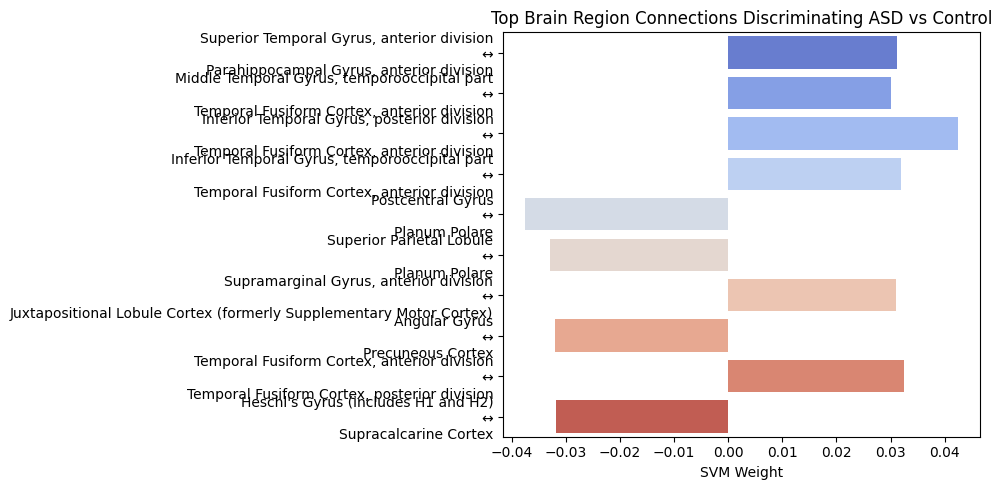

In [ ]:
# 📈 Visualize Top Discriminative Connections
print("\n🔍 Top discriminative connections:")
for a, b, w in region_pairs:
    print(f"{a} ↔ {b}: weight = {w:.4f}")

labels = [f"{a}\n↔\n{b}" for a, b, _ in region_pairs]
weights = [w for _, _, w in region_pairs]

plt.figure(figsize=(10, 5))
sns.barplot(x=weights, y=labels, palette="coolwarm")
plt.title("Top Brain Region Connections Discriminating ASD vs Control")
plt.xlabel("SVM Weight")
plt.tight_layout()
plt.show()

In [ ]:
from nilearn import plotting

In [ ]:
# Step 1: Get coordinates of brain regions from atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas.maps)

In [ ]:
# Step 2: Build a 2D matrix to hold only top features
n_regions = len(atlas.labels) - 1  # Exclude background
connectivity_matrix = np.zeros((n_regions, n_regions))


In [ ]:
# Fill the top features into the matrix
k = 0
for i in range(n_regions):
    for j in range(i + 1, n_regions):
        if k in top_features_idx:
            connectivity_matrix[i, j] = coef[k]
            connectivity_matrix[j, i] = coef[k]  # symmetric
        k += 1

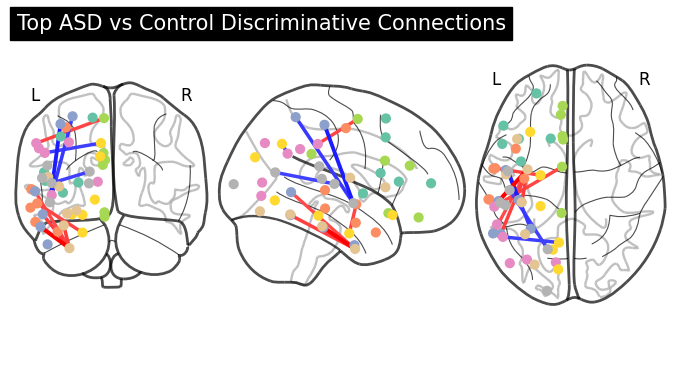

In [ ]:
# Step 3: Plot the connectome
plotting.plot_connectome(connectivity_matrix, coords,
                         node_size=40,
                         edge_threshold="80%",
                         title="Top ASD vs Control Discriminative Connections")
plotting.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import numpy as np

def flatten_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

# Filter only 2D FC matrices and flatten them
fc_matrices_flat = []
filtered_labels = []

for i, mat in enumerate(fc_matrices):
    if isinstance(mat, np.ndarray) and mat.ndim == 2:
        fc_matrices_flat.append(flatten_upper_triangle(mat))
        filtered_labels.append(diagnoses[i])  # Keep labels aligned

# Convert to arrays
X = np.array(fc_matrices_flat)
y = np.array(filtered_labels)

print(f"Shape of feature matrix X: {X.shape}")
print(f"Length of labels y: {len(y)}")


Shape of feature matrix X: (0,)
Length of labels y: 0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
print(f"Length of FC matrices: {len(fc_matrices)}")
print(f"Length of diagnoses: {len(y)}")
print(f"Shape of X: {X.shape if 'X' in locals() else 'X not defined'}")


Length of FC matrices: 50
Length of diagnoses: 0
Shape of X: (0,)


In [ ]:
# Access phenotypic data from ABIDE dataset
phenotypic_df = pd.DataFrame(data['phenotypic'])

# If you used 'func_preproc' to extract subjects, get those file names
fmri_files = data['func_preproc']
subject_ids = [f.split('/')[-1].split('_')[0] for f in fmri_files]  # Adjust this if needed

# Filter phenotypic data to only include subjects for whom we extracted FC matrices
phenotypic_df['SUB_ID_STR'] = phenotypic_df['SUB_ID'].astype(str)
matched_subjects = phenotypic_df[phenotypic_df['SUB_ID_STR'].isin(subject_ids)]

# Check size
print(f"Matched phenotypic subjects: {len(matched_subjects)}")

# Extract diagnosis labels (1 = ASD, 2 = Control)
diagnoses = matched_subjects['DX_GROUP'].tolist()


Matched phenotypic subjects: 0


In [ ]:
# Get an example file name
example_file = data['func_preproc'][0]
print("Example file path:", example_file)

# Inspect phenotypic data
phenotypic_df = pd.DataFrame(data['phenotypic'])
print("First few SUB_IDs from phenotypic data:")
print(phenotypic_df['SUB_ID'].head())


Example file path: /root/nilearn_data/ABIDE_pcp/ccs/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz
First few SUB_IDs from phenotypic data:
1    50003
2    50004
3    50005
4    50006
5    50007
Name: SUB_ID, dtype: int64


In [ ]:
import os
import re

phenotypic_df = pd.DataFrame(data['phenotypic'])
phenotypic_df['SUB_ID'] = phenotypic_df['SUB_ID'].astype(int)

matched_func_files = []
matched_labels = []

for func_path in data['func_preproc']:
    # Extract padded ID using regex
    match = re.search(r'_(\d+)_func_preproc.nii.gz', os.path.basename(func_path))
    if match:
        subject_id = int(match.group(1).lstrip("0"))  # remove leading zeros
        # Match with phenotypic SUB_ID
        matched_row = phenotypic_df[phenotypic_df['SUB_ID'] == subject_id]
        if not matched_row.empty:
            label = matched_row['DX_GROUP'].values[0]  # 1=ASD, 2=Control
            matched_func_files.append(func_path)
            matched_labels.append(label)

print(f"Matched subjects: {len(matched_func_files)}")



Matched subjects: 871


In [ ]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets
import nibabel as nib
import numpy as np

# Load Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = atlas.maps

# Set up masker to extract time series
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

# Compute FC matrices
fc_matrices = []

for func_file in matched_func_files:
    time_series = masker.fit_transform(func_file)
    correlation_matrix = np.corrcoef(time_series.T)
    fc_matrices.append(correlation_matrix)


[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
def flatten_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

fc_matrices_flat = [flatten_upper_triangle(fc) for fc in fc_matrices]






In [ ]:

from sklearn.impute import SimpleImputer

# Convert to NumPy array
X = np.array(fc_matrices_flat)
y = np.array(matched_labels)  # make sure matched_labels is defined earlier

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


# Impute missing values (NaNs) with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Then do the train-test split with the clean data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

Feature matrix shape: (871, 1128)
Label vector shape: (871,)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "SVM": SVC(kernel='linear', C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



SVM Accuracy: 0.5543
              precision    recall  f1-score   support

           1       0.53      0.48      0.51        83
           2       0.57      0.62      0.59        92

    accuracy                           0.55       175
   macro avg       0.55      0.55      0.55       175
weighted avg       0.55      0.55      0.55       175


Random Forest Accuracy: 0.5200
              precision    recall  f1-score   support

           1       0.49      0.35      0.41        83
           2       0.53      0.67      0.60        92

    accuracy                           0.52       175
   macro avg       0.51      0.51      0.50       175
weighted avg       0.51      0.52      0.51       175


Logistic Regression Accuracy: 0.5657
              precision    recall  f1-score   support

           1       0.55      0.48      0.51        83
           2       0.58      0.64      0.61        92

    accuracy                           0.57       175
   macro avg       0.56      0.56   

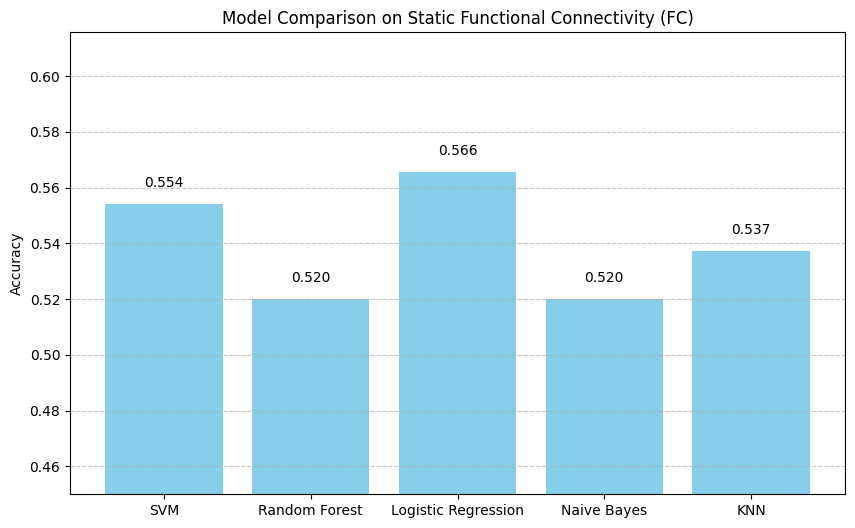

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy scores from the 'results' dictionary
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Static Functional Connectivity (FC)')
plt.ylim(0.45, max(results.values()) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally annotate bars with values
for model, acc in results.items():
    plt.text(model, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
from nilearn import plotting
import numpy as np

# Function to extract top connections and plot
def plot_top_connectome(coeffs, coords, title, percentile=95):
    # Zero out lower percentile weights
    threshold = np.percentile(np.abs(coeffs), percentile)
    masked_weights = np.where(np.abs(coeffs) >= threshold, coeffs, 0)

    # Reconstruct symmetric matrix from upper triangle
    n_regions = coords.shape[0]
    full_matrix = np.zeros((n_regions, n_regions))
    indices = np.triu_indices(n_regions, k=1)
    full_matrix[indices] = masked_weights
    full_matrix += full_matrix.T

    # Plot
    plotting.plot_connectome(full_matrix, coords,
                             node_size=40,
                             edge_threshold='80%',
                             title=title)
    plotting.show()


In [ ]:
def plot_top_connectome(weights, coords, title, percentile=80):
    # Get number of regions from one FC matrix
    n_regions = fc_matrices[0].shape[0]

    # Reconstruct symmetric matrix from upper triangle
    full_matrix = np.zeros((n_regions, n_regions))
    triu_indices = np.triu_indices(n_regions, k=1)

    if weights.shape[0] != len(triu_indices[0]):
        raise ValueError(f"Weight shape {weights.shape} doesn't match expected upper triangle size {len(triu_indices[0])}")

    full_matrix[triu_indices] = weights
    full_matrix += full_matrix.T  # Symmetric

    plotting.plot_connectome(full_matrix, coords,
                             node_size=40,
                             edge_threshold=f"{percentile}%",
                             title=title)
    plotting.show()


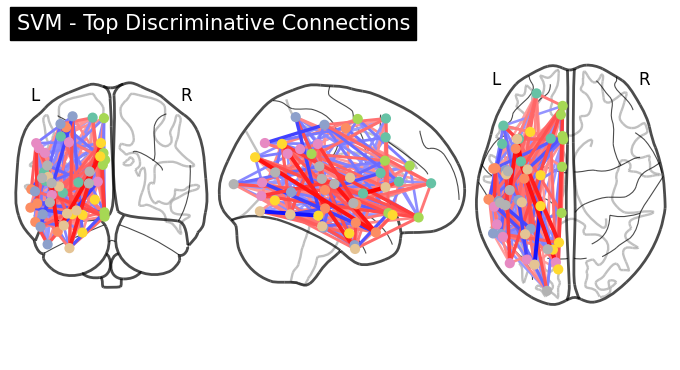

In [ ]:
svm_model = models["SVM"]
svm_weights = svm_model.coef_[0]
plot_top_connectome(svm_weights, coords, "SVM - Top Discriminative Connections")


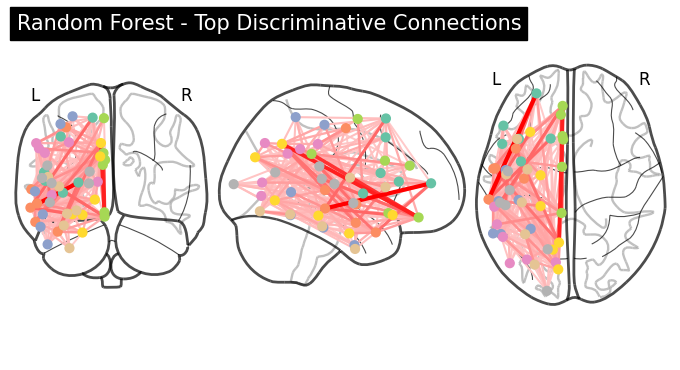

In [ ]:
rf_model = models["Random Forest"]
rf_importance = rf_model.feature_importances_
plot_top_connectome(rf_importance, coords, "Random Forest - Top Discriminative Connections")


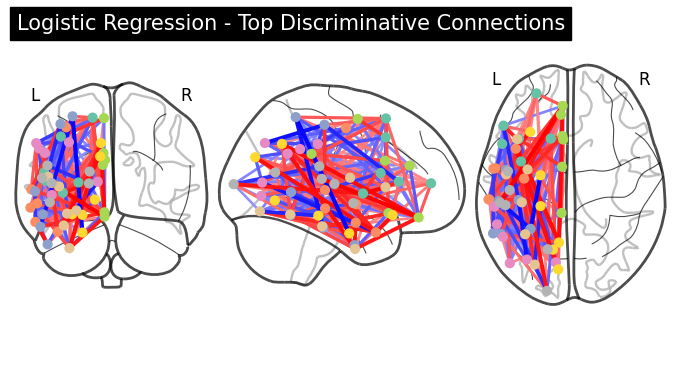

In [ ]:
lr_model = models["Logistic Regression"]
lr_weights = lr_model.coef_[0]
plot_top_connectome(lr_weights, coords, "Logistic Regression - Top Discriminative Connections")


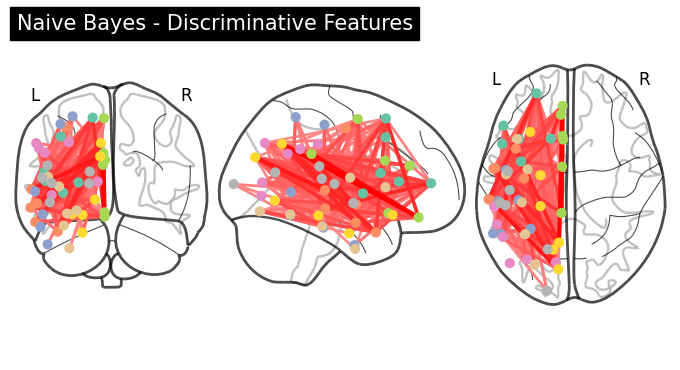

In [ ]:
nb_model = models["Naive Bayes"]
nb_weights = np.abs(nb_model.theta_[0] - nb_model.theta_[1])
plot_top_connectome(nb_weights, coords, "Naive Bayes - Discriminative Features")


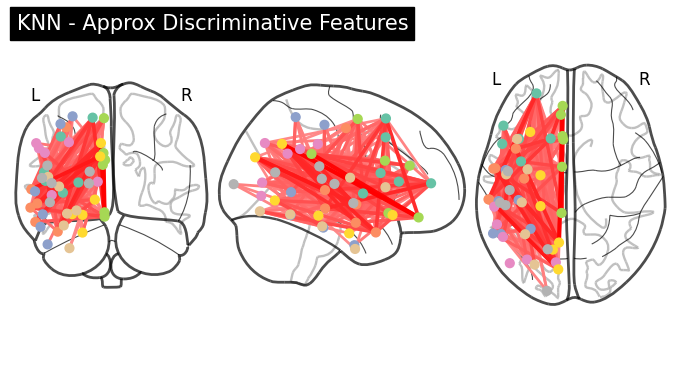

In [ ]:
X_train_1 = X_train[y_train == 1]
X_train_2 = X_train[y_train == 2]
knn_diff = np.abs(X_train_1.mean(axis=0) - X_train_2.mean(axis=0))
plot_top_connectome(knn_diff, coords, "KNN - Approx Discriminative Features")


In [ ]:
def get_top_connections(weights, region_labels, top_k=15):
    n_regions = len(region_labels)
    triu_indices = np.triu_indices(n_regions, k=1)

    abs_weights = np.abs(weights)
    top_idx = np.argsort(abs_weights)[-top_k:]

    connections = []
    values = []

    for idx in reversed(top_idx):
        i, j = triu_indices[0][idx], triu_indices[1][idx]
        label = f"{region_labels[i]} ↔ {region_labels[j]}"
        connections.append(label)
        values.append(weights[idx])

    return connections, values


def plot_feature_importance(weights, region_labels, title, top_k=15):
    connections, values = get_top_connections(weights, region_labels, top_k)

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("coolwarm", len(values))
    sns.barplot(x=values, y=connections, palette=colors)
    plt.xlabel("Model Weight")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
from nilearn import datasets

# Load Harvard-Oxford atlas again (if not already loaded)
ho_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
region_labels = ho_atlas.labels[1:]  # skip 'Background'


[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

Plotting for SVM...


<ipython-input-49-aa3bcbb923f4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=connections, palette=colors)


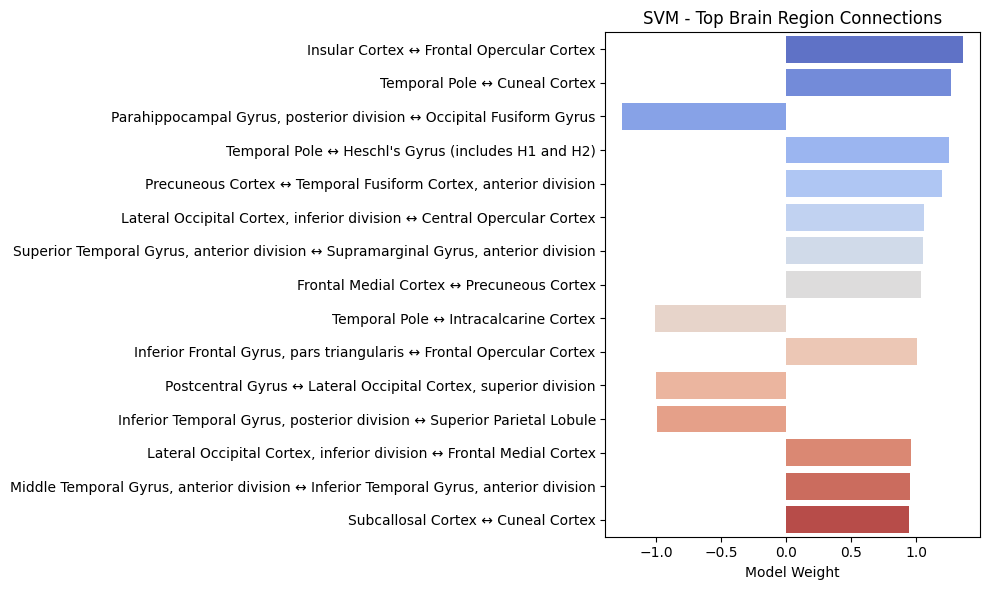

Plotting for Random Forest...


<ipython-input-49-aa3bcbb923f4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=connections, palette=colors)


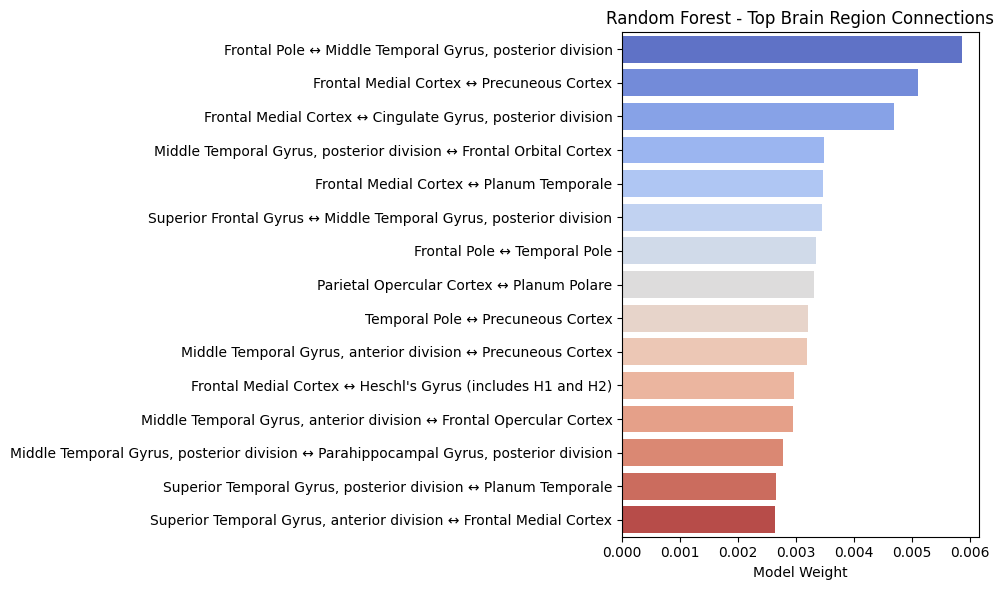

Plotting for Logistic Regression...


<ipython-input-49-aa3bcbb923f4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=connections, palette=colors)


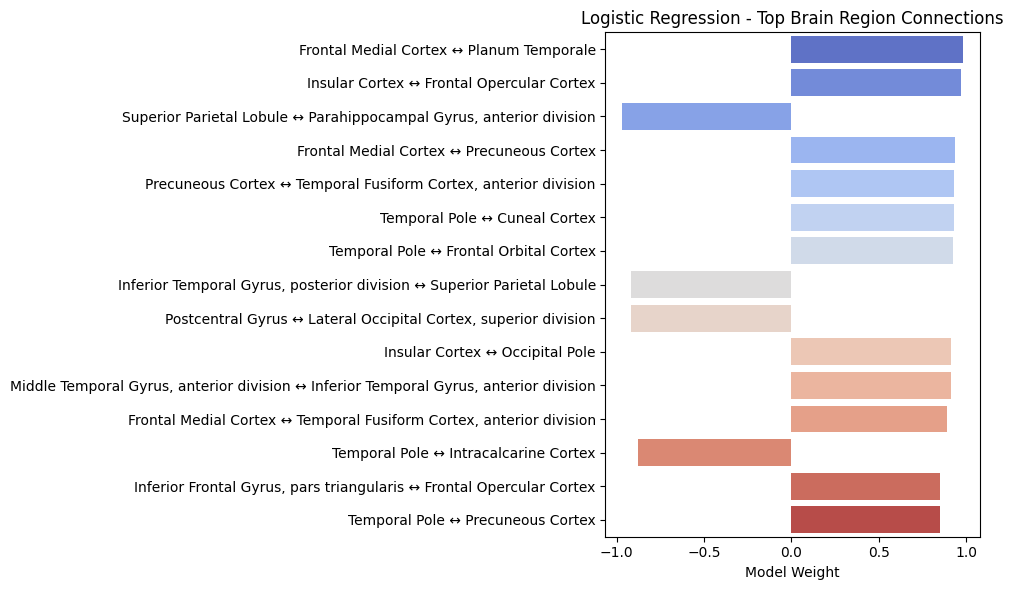

Plotting for Naive Bayes...
Skipping Naive Bayes — does not provide interpretable weights.
Plotting for KNN...
Skipping KNN — does not provide interpretable weights.


In [ ]:
# Extract weights and plot for models with interpretability
for name, model in models.items():
    print(f"Plotting for {name}...")

    if name == "SVM" and hasattr(model, 'coef_'):
        weights = model.coef_[0]
        plot_feature_importance(weights, region_labels, f"{name} - Top Brain Region Connections")

    elif name == "Logistic Regression" and hasattr(model, 'coef_'):
        weights = model.coef_[0]
        plot_feature_importance(weights, region_labels, f"{name} - Top Brain Region Connections")

    elif name == "Random Forest" and hasattr(model, 'feature_importances_'):
        weights = model.feature_importances_
        plot_feature_importance(weights, region_labels, f"{name} - Top Brain Region Connections")

    else:
        print(f"Skipping {name} — does not provide interpretable weights.")
